---
title: "Decades Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Decades

In [86]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# what does that data look like? 
tracks.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0          0.787   0.889    -3.125       0.1280      0.009510   
1          0.759   0.833    -5.010       0.0779      0.000260   
2          0.840   0.934    -3.717       0.1190      0.048400   
3          0.894   0.767    -4.695       0.1370      0.023100   
4          0.780   0.780    -2.857       0.0858      0.001470   
5          0.683   0.969    -3.290       0.1710      0.000275   
6          0.655   0.782    -6.825       0.3920      0.010500   
7          0.550   0.762    -7.861       0.3200      0.010900   
8          0.877   0.826    -3.750       0.2060      0.122000   
9          0.752   0.807    -4.386       0.1720      0.014600   
10         0.830   0.698    -6.517       0.0770      0.224000   
11         0.707   0.672    -6.186       0.0864      0.113000   
12         0.796   0.560    -6.135       0.2380      0.127000   
13         0.832   0.911    -4.068       0.2380      0.263000   
14         0.853   0.719    -3.599       0.1460      0.085100   
15         0.796   0.653    -3.644       0.2920      0.037300   
16         0.751   0.768    -4.594       0.0976      0.081100   
17         0.883   0.822    -4.029       0.1080      0.030100   
18         0.787   0.753    -6.938       0.2700      0.030200   
19         0.566   0.547    -9.777       0.1350      0.132000   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  \
0           0.000322    0.6520    0.677  156.027               4       172399   
1           0.057300    0.1780    0.522  140.026               4       183919   
2           0.000000    0.0961    0.670  149.994               4       145842   
3           0.000024    0.5740    0.412  144.077               4       140288   
4           0.000000    0.4720    0.446  118.014               4       177289   
5           0.126000    0.9400    0.595  170.017               4       226932   
6           0.003670    0.1200    0.372  167.003               4       164723   
7           0.001790    0.3980    0.347  200.211               4       162138   
8           0.000010    0.1040    0.814   75.003               4       238145   
9           0.000376    0.8000    0.442   87.507               4       195994   
10          0.000001    0.1910    0.595  132.990               4       175476   
11          0.000010    0.1030    0.326  129.951               4       158516   
12          0.000001    0.2920    0.698  149.884               4       141043   
13          0.000147    0.0865    0.557  159.865               4        97300   
14          0.000000    0.1780    0.628  152.029               4       142668   
15          0.005640    0.2420    0.386  152.051               4       227505   
16          0.000317    0.2050    0.384  150.005               4       154915   
17          0.000002    0.1110    0.327  110.024               4       143346   
18          0.000574    0.1870    0.432   84.997               4       155673   
19          0.000166    0.5380    0.267   70.000               4       173372   

   decade  key  mode  
0   2020s    2     1  
1   2020s   11     1  
2   2020s    0     1  
3   2020s   10     0  
4   2020s    0     1  
5   2020s    0     1  
6   2020s    8     1  
7   2020s    0     1  
8   2020s   10     0  
9   2020s   11     1  
10  2020s    5     0  
11  2020s    6     1  
12  2020s    6     1  
13  2020s    7     1  
14  2020s   11     0  
15  2020s    1     1  
16  2020s    1     1  
17  2020s    5     0  
18  2020s    6     0  
19  2020s    1     0

In [87]:
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
1950s     1159
Name: count, dtype: int64

In [88]:
decades = tracks

## Classification Data Prep

In [89]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0          0.787   0.889    -3.125       0.1280      0.009510   
1          0.759   0.833    -5.010       0.0779      0.000260   
2          0.840   0.934    -3.717       0.1190      0.048400   
3          0.894   0.767    -4.695       0.1370      0.023100   
4          0.780   0.780    -2.857       0.0858      0.001470   
5          0.683   0.969    -3.290       0.1710      0.000275   
6          0.655   0.782    -6.825       0.3920      0.010500   
7          0.550   0.762    -7.861       0.3200      0.010900   
8          0.877   0.826    -3.750       0.2060      0.122000   
9          0.752   0.807    -4.386       0.1720      0.014600   
10         0.830   0.698    -6.517       0.0770      0.224000   
11         0.707   0.672    -6.186       0.0864      0.113000   
12         0.796   0.560    -6.135       0.2380      0.127000   
13         0.832   0.911    -4.068       0.2380      0.263000   
14         0.853   0.719    -3.599       0.1460      0.085100   
15         0.796   0.653    -3.644       0.2920      0.037300   
16         0.751   0.768    -4.594       0.0976      0.081100   
17         0.883   0.822    -4.029       0.1080      0.030100   
18         0.787   0.753    -6.938       0.2700      0.030200   
19         0.566   0.547    -9.777       0.1350      0.132000   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  \
0           0.000322    0.6520    0.677  156.027               4       172399   
1           0.057300    0.1780    0.522  140.026               4       183919   
2           0.000000    0.0961    0.670  149.994               4       145842   
3           0.000024    0.5740    0.412  144.077               4       140288   
4           0.000000    0.4720    0.446  118.014               4       177289   
5           0.126000    0.9400    0.595  170.017               4       226932   
6           0.003670    0.1200    0.372  167.003               4       164723   
7           0.001790    0.3980    0.347  200.211               4       162138   
8           0.000010    0.1040    0.814   75.003               4       238145   
9           0.000376    0.8000    0.442   87.507               4       195994   
10          0.000001    0.1910    0.595  132.990               4       175476   
11          0.000010    0.1030    0.326  129.951               4       158516   
12          0.000001    0.2920    0.698  149.884               4       141043   
13          0.000147    0.0865    0.557  159.865               4        97300   
14          0.000000    0.1780    0.628  152.029               4       142668   
15          0.005640    0.2420    0.386  152.051               4       227505   
16          0.000317    0.2050    0.384  150.005               4       154915   
17          0.000002    0.1110    0.327  110.024               4       143346   
18          0.000574    0.1870    0.432   84.997               4       155673   
19          0.000166    0.5380    0.267   70.000               4       173372   

   decade key major  
0   2020s   2     1  
1   2020s  11     1  
2   2020s   0     1  
3   2020s  10     0  
4   2020s   0     1  
5   2020s   0     1  
6   2020s   8     1  
7   2020s   0     1  
8   2020s  10     0  
9   2020s  11     1  
10  2020s   5     0  
11  2020s   6     1  
12  2020s   6     1  
13  2020s   7     1  
14  2020s  11     0  
15  2020s   1     1  
16  2020s   1     1  
17  2020s   5     0  
18  2020s   6     0  
19  2020s   1     0

In [90]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
0       0.798174   0.889  0.926877     0.132368      0.009548   
1       0.769777   0.833  0.896157     0.080558      0.000261   
2       0.851927   0.934  0.917229     0.123061      0.048594   
3       0.906694   0.767  0.901291     0.141675      0.023193   
4       0.791075   0.780  0.931244     0.088728      0.001476   
5       0.692698   0.969  0.924188     0.176836      0.000276   
6       0.664300   0.782  0.866579     0.405377      0.010542   
7       0.557809   0.762  0.849695     0.330920      0.010944   
8       0.889452   0.826  0.916691     0.213030      0.122490   
9       0.762677   0.807  0.906326     0.177870      0.014659   
10      0.841785   0.698  0.871598     0.079628      0.224900   
11      0.717039   0.672  0.876992     0.089349      0.113454   
12      0.807302   0.560  0.877823     0.246122      0.127510   
13      0.843813   0.911  0.911509     0.246122      0.264056   
14      0.865112   0.719  0.919152     0.150982      0.085442   
15      0.807302   0.653  0.918419     0.301965      0.037450   
16      0.761663   0.768  0.902937     0.100931      0.081426   
17      0.895538   0.822  0.912144     0.111686      0.030221   
18      0.798174   0.753  0.864737     0.279214      0.030321   
19      0.574037   0.547  0.818471     0.139607      0.132530   

    instrumentalness  liveness  valence     tempo  time_signature  \
0           0.000323  0.657921    0.677  0.642179             0.8   
1           0.057415  0.179617    0.522  0.576322             0.8   
2           0.000000  0.096973    0.670  0.617348             0.8   
3           0.000024  0.579213    0.412  0.592995             0.8   
4           0.000000  0.476287    0.446  0.485724             0.8   
5           0.126253  0.948537    0.595  0.699759             0.8   
6           0.003677  0.121090    0.372  0.687354             0.8   
7           0.001794  0.401615    0.347  0.824032             0.8   
8           0.000011  0.104945    0.814  0.308699             0.8   
9           0.000377  0.807265    0.442  0.360163             0.8   
10          0.000001  0.192735    0.595  0.547363             0.8   
11          0.000010  0.103935    0.326  0.534855             0.8   
12          0.000001  0.294652    0.698  0.616895             0.8   
13          0.000147  0.087286    0.557  0.657975             0.8   
14          0.000000  0.179617    0.628  0.625724             0.8   
15          0.005651  0.244198    0.386  0.625814             0.8   
16          0.000318  0.206862    0.384  0.617393             0.8   
17          0.000002  0.112008    0.327  0.452839             0.8   
18          0.000575  0.188698    0.432  0.349832             0.8   
19          0.000166  0.542886    0.267  0.288107             0.8   

    duration_ms decade key major  
0      0.035570  2020s   2     1  
1      0.038003  2020s  11     1  
2      0.029960  2020s   0     1  
3      0.028787  2020s  10     0  
4      0.036603  2020s   0     1  
5      0.047089  2020s   0     1  
6      0.033948  2020s   8     1  
7      0.033402  2020s   0     1  
8      0.049458  2020s  10     0  
9      0.040554  2020s  11     1  
10     0.036220  2020s   5     0  
11     0.032637  2020s   6     1  
12     0.028946  2020s   6     1  
13     0.019706  2020s   7     1  
14     0.029289  2020s  11     0  
15     0.047210  2020s   1     1  
16     0.031876  2020s   1     1  
17     0.029433  2020s   5     0  
18     0.032037  2020s   6     0  
19     0.035775  2020s   1     0

In [91]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (45005, 13) 
Shape of X_test:  (11252, 13) 
Shape of y_train:  (45005, 1) 
Shape of y_test:  (11252, 1)


In [92]:
train['decade'].value_counts()

decade
2010s    15094
2020s    11600
2000s     6064
1990s     3752
1960s     2960
1970s     2586
1980s     2009
1950s      940
Name: count, dtype: int64

In [93]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=137)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1950s    940
1960s    940
1970s    940
1980s    940
1990s    940
2000s    940
2010s    940
2020s    940
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [94]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [95]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1950s    940
1960s    940
1970s    940
1980s    940
1990s    940
2000s    940
2010s    940
2020s    940
Name: count, dtype: int64

In [96]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    3769
2020s    2910
2000s    1526
1990s     885
1960s     778
1970s     655
1980s     510
1950s     219
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

## Logistic Regression using OVR

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Text(0.5, 1.0, 'Training Confusion Matrix')

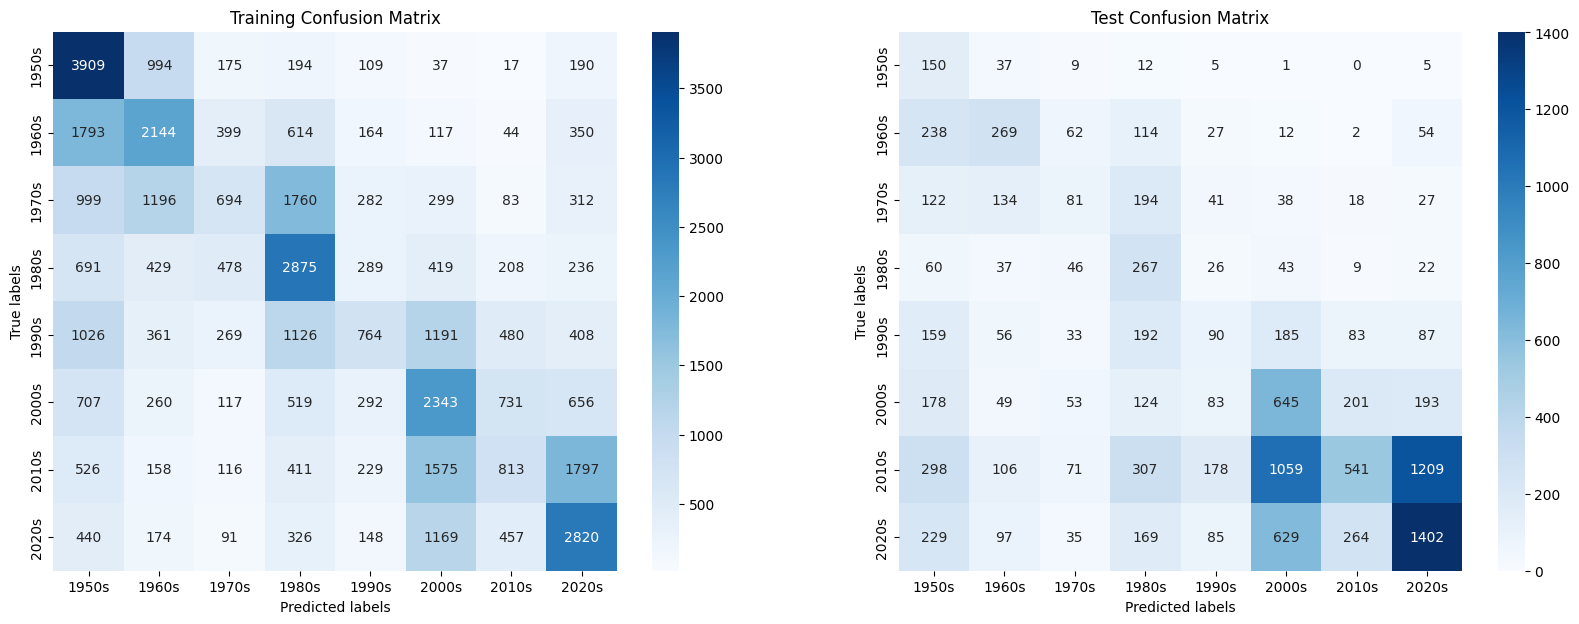

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [ ]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Training Confusion Matrix')

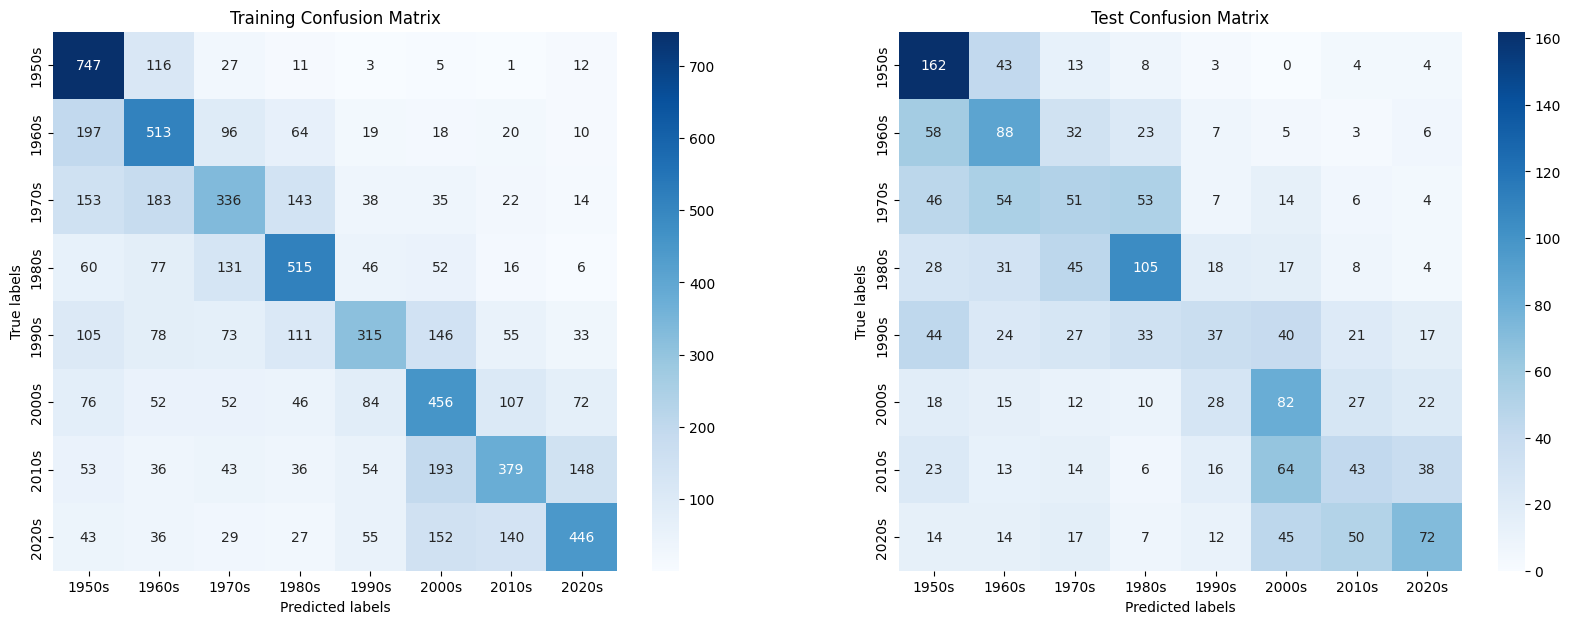

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [2, 3, 4],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1475 - loss: 3.1500  
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1437 - loss: 2.2196
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1350 - loss: 3.5563
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1445 - loss: 2.2197
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1490 - loss: 3.1374
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1689 - loss: 2.1959
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1365 - loss: 3.0760
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1351 - loss: 3.1147
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1613 - loss: 2.191570
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1511 - loss: 3.089800
Epoch 2/50
18

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3493 - loss: 1.6810
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3780 - loss: 1.6634
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3623 - loss: 1.683
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3629 - loss: 1.67
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2386 - loss: 1.8691
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3585 - loss: 1.68
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3611 - loss: 1.6782
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.8711
142/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3576 - loss: 1.6786Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3590 - loss: 1.6754 
120/186 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.2307 - loss: 1.8781

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.2309 - loss: 1.8757
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
Epoch 1/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/stepEpoch 1/50
Epoch 1/50
Epoch 1/50
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step Epoch 1/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 1:32 500ms/step - accuracy: 0.0625 - loss: 4.5037Epoch 1/50
 30/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1379 - loss: 4.2520

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1602 - loss: 3.5452  
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1342 - loss: 3.5424  
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1759 - loss: 2.2386
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1548 - loss: 2.2643
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2118 - loss: 2.2565
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1558 - loss: 2.2659
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1482 - loss: 3.5745
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1687 - loss: 2.2466    
 39/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2233 - loss: 2.1141 Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1363 - loss: 2.2882
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2017 - loss: 2.24401 
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2458 - loss: 1.8725
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.8884
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2511 - loss: 1.8768
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3617 - loss: 1.6724
Epoch 46/50
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2297 - loss: 1.8904
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3566 - loss: 1.7038
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3590 - loss: 1.6696
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3570 - loss: 1.6654
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3506 - loss: 1.6749
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2484 - loss: 1.8735
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1259 - loss: 2.0794
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3440 - loss: 1.6958
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.3615 - loss: 1.674
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.9029
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2470 - loss: 1.8680
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 1.6766
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2408 - loss: 1.8788
Epoch 50/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2812 - loss: 1.8499Epoch 1/50
 52/186 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.2656 - loss: 1.8668Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepstep - accuracy: 0.2212 - loss: 2.00
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1164 - loss: 2.0795
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.2209 - loss: 2.0043
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/50
  1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.2505 - loss: 1.8820
Epoch 50/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.3660 - loss: 1.6590
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2357 - loss: 1.8823
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.1288 - loss: 2.0793
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.2298 - loss: 1.9845
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - accuracy: 0.2361 - loss: 1.891
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.2362 - loss: 1.8913
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepstep - accuracy: 0.1174 - loss: 2.079
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.2396 - loss: 1.8910
136/186 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.1244 - loss: 2.0795Epoch 1/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.1250 - loss: 2.0795
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/stepep - accuracy: 0.2347 - loss: 1.961
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.2346 - loss: 1.9607
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step tep - accuracy: 0.2339 - loss: 1.965
 69/186 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.2473 - loss: 1.8624 Epoch 1/50
109/186 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.2342 - loss: 1.9615Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.8748
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.9564
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.2268 - loss: 1.9569
 88/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2312 - loss: 1.9554Epoch 1/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2:53 938ms/step - accuracy: 0.1250 - loss: 2.3702.2966    

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.9514
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.1472 - loss: 2.2603 
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1587 - loss: 2.2319
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2284 - loss: 1.9398  
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1412 - loss: 2.2545
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1486 - loss: 2.2407 6
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1440 - loss: 2.2498
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1400 - loss: 4.1936  
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2167 - loss: 2.0396
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 2.0184
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2262 - loss: 1.9422  
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3602 - loss: 1.7000
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3384 - loss: 1.7046
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2285 - loss: 1.9049
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2324 - loss: 1.9076
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3766 - loss: 1.6562
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3397 - loss: 1.7205 
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2385 - loss: 1.8847
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2279 - loss: 1.8972
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3304 - loss: 1.7287
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3501 - loss: 1.6943
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2323 - loss: 1.9000
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 1.8768
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3614 - loss: 1.6642
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 1.6905
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2320 - loss: 1.9043
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3389 - loss: 1.7068 
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.8834
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3319 - loss: 1.7098
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2276 - loss: 1.911948
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1583 - loss: 2.3295
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3468 - loss: 1.7158
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 1.8998
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.8885
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.2962 - loss: 1.838
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.8386
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2317 - loss: 1.8957
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2283 - loss: 1.8980
110/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2406 - loss: 1.8940Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2384 - loss: 1.8866
Epoch 45/50
 14/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2316 - loss: 1.8813 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2783 - loss: 1.8668
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2399 - loss: 1.8947
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3682 - loss: 1.6597
Epoch 44/50
 78/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2805 - loss: 1.83

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2395 - loss: 1.8951
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3429 - loss: 1.6891
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3568 - loss: 1.6870
164/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.8869Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2865 - loss: 1.8368
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.8872
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2242 - loss: 1.8978
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 1.8974  
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2799 - loss: 1.8594
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2362 - loss: 1.8917
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3658 - loss: 1.6657
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepep - accuracy: 0.2713 - loss: 1.9208 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2382 - loss: 1.9075
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3024 - loss: 1.8080
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3676 - loss: 1.6703
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8783
Epoch 48/50
170/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2739 - loss: 1.9181Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2671 - loss: 1.8995
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2738 - loss: 1.9174   
Epoch 5/50
 26/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2642 - loss: 1.9065 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.8928
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2272 - loss: 1.8846
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.7831
 30/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.8832 Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2345 - loss: 1.8902
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2761 - loss: 1.8805
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 1.8825
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2932 - loss: 1.8014
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2772 - loss: 1.8743
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3548 - loss: 1.6803
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 1.8875 
Epoch 49/50
144/186 ━━━━━━━━━━━━━━━━━━━━ 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2806 - loss: 1.8771
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2389 - loss: 1.8928
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3070 - loss: 1.7969
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.3501 - loss: 1.6840
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.8800
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3522 - loss: 1.6836
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3076 - loss: 1.7892
Epoch 12/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3438 - loss: 1.9343Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2377 - loss: 1.9067
Epoch 50/50
 88/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2325 - loss: 1.8877

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2796 - loss: 1.8519
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2810 - loss: 1.8395
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.8914 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.7714
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3744 - loss: 1.6686
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.8891
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3239 - loss: 1.7638
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2885 - loss: 1.8355
 53/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1330 - loss: 4.5345Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.9039
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2941 - loss: 1.8437
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepuracy: 0.3125 - loss: 1.79
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1339 - loss: 3.9241
121/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2867 - loss: 1.8227Epoch 2/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3086 - loss: 1.7729
Epoch 17/50
Epoch 1/50
161/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2869 - loss: 1.8256Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2865 - loss: 1.8260
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.7585 
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2884 - loss: 1.8370
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1409 - loss: 3.9186
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1304 - loss: 2.3273  
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2993 - loss: 1.8244
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3010 - loss: 1.8106
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3475 - loss: 1.6955 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3526 - loss: 1.7005
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3289 - loss: 1.7515
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1287 - loss: 2.0794
Epoch 27/50
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 2.0797
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.1252 - loss: 2.0793
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3327 - loss: 1.7226
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1298 - loss: 2.0794
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3482 - loss: 1.6882
Epoch 50/50
Epoch 1/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3750 - loss: 1.7102: 2.0793

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1253 - loss: 2.0794
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7414 
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 2.0796
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1330 - loss: 2.0792 
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1272 - loss: 2.0795
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3421 - loss: 1.6955
170/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.0794Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3541 - loss: 1.6853
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1259 - loss: 2.0794
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3344 - loss: 1.7342
Epoch 32/50
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3301 - loss: 1.7274 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
186/186 ━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss: 1.7346
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0797
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1226 - loss: 2.079103
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 1.7363
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.1525 - loss: 2.2791
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.7095
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: 2.0795
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1230 - loss: 2.0795
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.07941
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3226 - loss: 1.7256 
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.2234 - loss: 2.0321
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1371 - loss: 2.0793
 64/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1370 - loss: 2.0791Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2676 - loss: 1.8896
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1269 - loss: 2.0800
Epoch 5/50
126/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1320 - loss: 2.0793Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1333 - loss: 2.0793
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2893 - loss: 1.8489
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.7459
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1305 - loss: 2.0794 
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2767 - loss: 1.8630
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.7090
Epoch 34/50
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1227 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1294 - loss: 2.0795
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3388 - loss: 1.7070
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3358 - loss: 1.7208 
 56/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.7756Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.8110
Epoch 14/50
148/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1161 - loss: 2.0797Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1174 - loss: 2.0797 
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1279 - loss: 2.0794
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3017 - loss: 1.8048  
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1251 - loss: 2.0796
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3195 - loss: 1.7420
125/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3493 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3488 - loss: 1.7217
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepep - accuracy: 0.1273 - loss: 2.0770 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.3431 - loss: 1.7067
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1365 - loss: 2.0790
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1264 - loss: 2.0794
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1275 - loss: 2.0794
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 1.7050
158/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3623 - loss: 1.6834Epoch 49/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0625 - loss: 2.0775Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.0797
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3428 - loss: 1.7137
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3615 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1329 - loss: 2.0794
Epoch 11/50
127/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1161 - loss: 2.0791Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3338 - loss: 1.7271
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3442 - loss: 1.6994
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3456 - loss: 1.6942 
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1172 - loss: 2.0793
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1210 - loss: 2.0794
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1323 - loss: 2.0793
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3474 - loss: 1.6982
 28/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1260 - loss: 2.0791Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3316 - loss: 1.7183
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1306 - loss: 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1140 - loss: 2.0796
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 1.7137
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/stepracy: 0.3750 - loss: 1.80ss: 1.6814
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3357 - loss: 1.7073
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1218 - loss: 2.0793 
Epoch 13/50
 30/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1316 - loss: 6.4812 Epoch 1/50
176/186 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1272 - loss: 2.0794

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3496 - loss: 1.7190
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3408 - loss: 1.7074
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1271 - loss: 2.0795
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1238 - loss: 2.0793
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1285 - loss: 2.0790
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1343 - loss: 4.7762
180/186 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3412 - loss: 1.7088Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3412 - loss: 1.7088
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3543 - loss: 1.6884
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1561 - loss: 2.4196
 79/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1380 - loss: 2.0790Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.7222
Epoch 40/50
186/186 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1270 - loss: 2.1773 
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1343 - loss: 2.0795
 17/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1535 - loss: 2.0801 Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3522 - loss: 1.6891
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1220 - loss: 2.0846
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3510 - loss: 1.7108
Epoch 40/50
Epoch 1/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0625 - loss: 2.0831Epoch 1/50 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 1.9692
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2258 - loss: 2.0751
 44/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3229 - loss: 1.7515  Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1213 - loss: 2.0795
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.340

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0938 - loss: 2.0823Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 1.8829
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.0796
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 1.7878
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2824 - loss: 1.8221
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2245 - loss: 2.0196
 63/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1154 - loss: 2.0804Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2781 - loss: 1.8819
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3476 - loss: 1.7003
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1287 - loss: 2.0791
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1264 - loss: 2.0796
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1317 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2411 - loss: 1.9157
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2921 - loss: 1.8039 
Epoch 15/50
 84/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 2.0795Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1349 - loss: 2.0793
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.079665
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1233 - loss: 2.0795
Epoch 21/50
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.2267 - loss: 1.9101
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1266 - loss: 2.0793
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.7924
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1294 - loss: 2.0793
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7637
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3241 - loss: 1.7522  
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3067 - loss: 1.76247
 33/186 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2054 - loss: 2.3990Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2362 - loss: 1.9009
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1165 - loss: 2.0798
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1246 - loss: 2.0794
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1317 - loss: 2.0795
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1312 - loss: 2.0793 
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3257 - loss: 1.7348
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3426 - loss: 1.7101 
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2294 - loss: 1.9056
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.2371 - loss: 1.8912
Epoch 27/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: 1.6976
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1143 - loss: 2.07970
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3426 - loss: 1.7031
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1345 - loss: 2.0795
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1211 - loss: 2.0797
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.2424 - loss: 1.8927
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3106 - loss: 1.7438 
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1282 - loss: 2.0797
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3463 - loss: 1.705461
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 1.6857
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1295 - loss: 2.0793
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3505 - loss: 1.69201
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1277 - loss: 2.0794
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.2379 - loss: 1.8847
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.2294 - loss: 1.9637
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3340 - loss: 1.7152
103/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1299 - loss: 2.0788Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.3477 - loss: 1.689
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 1.7451
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3467 - loss: 1.7015
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1191 - loss: 2.0797
Epoch 48/50
Epoch 48/50
 56/186 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.2430 - loss: 1.8680

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2354 - loss: 1.9174
Epoch 12/50
105/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3565 - loss: 1.6883Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3462 - loss: 1.69104
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.0791
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.2426 - loss: 1.8794
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2367 - loss: 1.9506
  1/186 ━━━━━━━━━━━━━━━━━━━━ 1:18 427ms/step - accuracy: 0.0625 - loss: 3.6820Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 1.6956
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 1.72263
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.1333 - loss: 3.1375
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0796
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.1468 - loss: 2.2246
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.7284
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 2.07940
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3453 - loss: 1.6949
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.6870
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.2503 - loss: 1.8798
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2191 - loss: 2.0968  
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3497 - loss: 1.68243 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.2204 - loss: 2.0467
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3365 - loss: 1.7116
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.2389 - loss: 1.8881
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 8

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3402 - loss: 1.7092
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2513 - loss: 1.8703
 68/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2307 - loss: 1.9091Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2321 - loss: 1.9674  
 60/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3785 - loss: 1.6700Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3212 - loss: 1.7375
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 1.9179
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.2217 - loss: 2.0189
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2247 - loss: 1.9339
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2302 - loss: 1.8830  
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3583 - loss: 1.6908
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2235 - loss: 1.9616  
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 11/186 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3031 - loss: 1.7077 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2851 - loss: 1.8160
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2336 - loss: 1.916045
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2338 - loss: 1.8787
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.2690 - loss: 1.8939
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2883 - loss: 1.8546
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.2997 - loss: 1.8219
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2661 - loss: 1.8765 
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.3010 - loss: 1.7854
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2381 - loss: 1.9140
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.2366 - loss: 1.9282
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 924u

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3175 - loss: 1.7640
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.2285 - loss: 1.9061
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.2795 - loss: 1.8158
120/186 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.2832 - loss: 1.8073Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2409 - loss: 1.9187
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.3029 - loss: 1.8026
 56/186 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.3029 - loss: 1.7864Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2063 - loss: 2.2729 
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.2900 - loss: 1.8003
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2933 - loss: 1.82246
142/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2381 - loss: 1.9095Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.3105 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 91/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3478 - loss: 1.7090Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3244 - loss: 1.7300
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 1.7028
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3464 - loss: 1.7052
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2434 - loss: 1.8752
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3400 - loss: 1.7063
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2277 - loss: 1.8925
104/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3622 - loss: 1.6832Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3342 - loss: 1.7218
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3449 - loss: 1.7109  
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.2265 - loss: 1.903
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2265 - loss: 1.9041
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2299 - loss: 1.8845
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.3477 - loss: 1.7012
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2305 - loss: 1.8807
  1/186 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4688 - loss: 1.5336Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2271 - loss: 1.9173
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2409 - loss: 1.8851
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2347 - loss: 1.9117
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3580 - loss: 1.6905
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.3583 - loss: 1.6725
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3497 - loss: 1.6779
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2365 - loss: 1.9013
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3612 - loss: 1.6721
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.8877
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.8979
 46/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.8541 Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 1.8967
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/stepep - accuracy: 0.2449 - loss: 1.919
 16/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2443 - loss: 1.8747 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2297 - loss: 1.8871
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2382 - loss: 1.8759
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3587 - loss: 1.6737
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2372 - loss: 1.9118
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2336 - loss: 1.9050
13/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.8876
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2453 - loss: 1.8983 
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2237 - loss: 2.0843
Epoch 4/50
 45/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2299 - loss: 1.9160 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.1652 - loss: 2.2569
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2387 - loss: 1.9026
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.887460
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2260 - loss: 1.8878
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2349 - loss: 1.9071
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3590 - loss: 1.6796
Epoch 20/50
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 1.896370
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.8874
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2374 - loss: 1.8967
Epoch 23/50
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2390 - loss: 1.8836 
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2271 - loss: 1.8977
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2832 - loss: 1.8721
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2295 - loss: 1.9349 
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2935 - loss: 1.8534
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2185 - loss: 1.8901
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2372 - loss: 1.9070
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.8738
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.8946
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.8294
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss: 1.8832
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2754 - loss: 1.8710
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8984
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2296 - loss: 1.8785
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2495 - loss: 1.8921
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3210 - loss: 1.7543
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.7680
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2938 - loss: 1.815670
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2475 - loss: 1.8807
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.8927 
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: 1.7876
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2499 - loss: 1.8876
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2352 - loss: 1.8880
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3471 - loss: 1.7165
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2478 - loss: 1.8928
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3479 - loss: 1.708558
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.2373 - loss: 1.8846
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.7918
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.8847
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2182 - loss: 1.9403
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3358 - loss: 1.7276  
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/186 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.1281 - loss: 3.5862Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2340 - loss: 1.8905
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1279 - loss: 3.5019 
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2403 - loss: 1.8780 
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2501 - loss: 1.8757
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3511 - loss: 1.6890
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3442 - loss: 1.7195
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2243 - loss: 1.9352
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1281 - loss: 2.2779
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3297 - loss: 1.7619 
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2309 - loss: 1.8859
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3181 - loss: 1.7610
137/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3323 - loss: 1.7194Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1439 - loss: 3.5396  
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3439 - loss: 1.7112
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2342 - loss: 1.8951
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2316 - loss: 1.9050
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3328 - loss: 1.7212
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1262 - loss: 2.0843
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3333 - loss: 1.705822
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2379 - loss: 1.8839
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.1785 - loss: 2.3113
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3354 - loss: 1.7127
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3570 - loss: 1.6846
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3503 - loss: 1.6827
Epoch 50/50
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.923398
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1348 - loss: 2.0794
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3447 - loss: 1.706252
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 1.87849
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2349 - loss: 1.9002
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2348 - loss: 1.9248  
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3621 - loss: 1.6841
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2160 - loss: 1.9321
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 1.9137
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2303 - loss: 1.8873
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.9174
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1184 - loss: 2.0794
Epoch 18/50
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3408 - loss: 1.7208 
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3560 - loss: 1.6965 
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3378 - loss: 1.7219
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2369 - loss: 1.9034
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2412 - loss: 1.861082
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2393 - loss: 1.9001
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.1435 - loss: 2.2616
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1126 - loss: 2.0799
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3487 - loss: 1.7034
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2425 - loss: 1.8939
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2357 - loss: 1.9226
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2888 - loss: 1.848503
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3436 - loss: 1.7221
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2923 - loss: 1.8051
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3571 - loss: 1.6925
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1170 - loss: 2.0801
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1288 - loss: 2.0795
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2290 - loss: 1.8918
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3511 - loss: 1.6877
 32/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 1.8732 Epoch 45/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1215 - loss: 2.0796
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3454 - loss: 1.7021  
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.8020
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3426 - loss: 1.7010 
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3012 - loss: 1.8008
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3478 - loss: 1.6822
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1163 - loss: 2.0796
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3049 - loss: 1.8024
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3530 - loss: 1.6812
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.3167 - loss: 1.7552
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 1.7693  
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3410 - loss: 1.6956
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2085 - loss: 2.0467
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.2617 - loss: 1.9142
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1278 - loss: 2.0797 
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2275 - loss: 1.9121
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3080 - loss: 1.7660
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3322 - loss: 1.7273
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3588 - loss: 1.6863
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1255 - loss: 2.0795 
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2573 - loss: 1.9177
112/186 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.2909 - loss: 1.8223Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2182 - loss: 2.0454
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3258 - loss: 1.7475
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3501 - loss: 1.7184
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3609 - loss: 1.6730
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1211 - loss: 2.0798
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2851 - loss: 1.8304  
 55/186 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3192 - loss: 1.7339Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3509 - loss: 1.6887
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1203 - loss: 2.0794
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.3198 - loss: 1.7304
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2803 - loss: 1.8573  
Epoch 9/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3750 - loss: 1.8671Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.3033 - loss: 1.7871
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2340 - loss: 1.8967
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/stepstep - accuracy: 0.2694 - loss: 1.88
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.8969
Epoch 41/50
155/186 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.2728 - loss: 1.8730Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 1.8411
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1305 - loss: 2.0796
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3396 - loss: 1.7301
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/stepep - accuracy: 0.2371 - loss: 1.95.68
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3251 - loss: 1.7160  
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3505 - loss: 1.6926 
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2191 - loss: 1.9069 
Epoch 45/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2188 - loss: 1.9155Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 1.9539
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2402 - loss: 1.9313
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3355 - loss: 1.7238
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3467 - loss: 1.6942
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.2573 - loss: 1.906
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2362 - loss: 1.9245
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3398 - loss: 1.7176
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3327 - loss: 1.7388
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2372 - loss: 1.9132
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 1.9365
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2411 - loss: 1.925532
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.3423 - loss: 1.7228
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121 - loss: 1.7517
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.3351 - loss: 1.7251
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2329 - loss: 1.8941
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.3411 - loss: 1.7169
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2343 - loss: 1.9249
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3551 - loss: 1.7035
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2223 - loss: 1.925912
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1324 - loss: 2.10434
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.3442 - loss: 1.7032
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 1.6740
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1282 - loss: 2.0794
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.3459 - loss: 1.7082
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2793 - loss: 1.8863
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 1.9175
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.3351 - loss: 1.6979
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.926587
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3256 - loss: 1.7337
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2946 - loss: 1.8321
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2455 - loss: 1.9964
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2458 - loss: 1.9124
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2353 - loss: 1.9062
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3480 - loss: 1.6967
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3689 - loss: 1.6839
Epoch 50/50
165/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2331 - loss: 1.9128Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 2.0792
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1287 - loss: 2.0801
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2336 - loss: 1.9124
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2565 - loss: 1.9515
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1243 - loss: 2.0798
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3292 - loss: 1.7306
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2343 - loss: 1.9187
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - accuracy: 0.2211 - loss: 2.080
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2813 - loss: 1.8536
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1187 - loss: 2.0797 
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2208 - loss: 2.0736
Epoch 3/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3064 - loss: 1.7954
Epoch 15/50
 92/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2478 - loss: 1.8860   

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepep - accuracy: 0.2914 - loss: 1.785
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.9022
Epoch 22/50
 96/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2598 - loss: 1.8957Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.8368
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2202 - loss: 2.0039
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2970 - loss: 1.7831
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2433 - loss: 1.8915
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1336 - loss: 2.0794
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3249 - loss: 1.7422
 42/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.9550 Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2524 - loss: 1.8990
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2803 - loss: 1.8

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3492 - loss: 1.6958
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3425 - loss: 1.7189
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3370 - loss: 1.7179
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2426 - loss: 1.8929
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1358 - loss: 2.0793 
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.8931
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2334 - loss: 1.8957
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1200 - loss: 2.0795
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3525 - loss: 1.6811
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3082 - loss: 1.7981
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss: 1.7257
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1168 - loss: 2.0801
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.3478 - loss: 1.6770
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2395 - loss: 1.8901
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3529 - loss: 1.6884
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3418 - loss: 1.7250
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1229 - loss: 2.0793
Epoch 22/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3085 - loss: 1.7776
 35/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2376 - loss: 1.8861 Epoch 17/50
185/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1247 - loss: 2.0794 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1246 - loss: 2.0794
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1229 - loss: 2.0796
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3434 - loss: 1.7021
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.0794
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.8851
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3514 - loss: 1.7041
183/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3580 - loss: 1.6721Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3580 - loss: 1.6724
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3568 - loss: 1.6932  
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1141 - loss: 2.0798 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1259 - loss: 2.0797
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3534 - loss: 1.7024Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.8947
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3516 - loss: 1.7041
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1310 - loss: 2.0795
 48/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1308 - loss: 4.5751    Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.1319 - loss: 2.079
156/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1214 - loss: 2.0797Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3405 - loss: 1.7300 
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1216 - loss: 2.0797
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1375 - loss: 3.9713
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.1184 - loss: 3.8853
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3560 - loss: 1.6957
183/1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1271 - loss: 2.0797
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1309 - loss: 2.0794
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1331 - loss: 2.0792
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1300 - loss: 2.0794 
Epoch 13/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0938 - loss: 2.0782Epoch 1/50
156/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2819 - loss: 1.8382

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1221 - loss: 2.0801
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0796
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 1.8369
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1221 - loss: 2.0795
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1325 - loss: 2.0793
Epoch 16/50
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3255 - loss: 1.7572 
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1223 - loss: 2.0793  
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3533 - loss: 1.6925
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1270 - loss: 2.0792
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1264 - loss: 2.0795
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2985 - loss: 1.8209
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1181 - loss: 2.0797
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1212 - loss: 2.0794
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3416 - loss: 1.7032
128/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1280 - loss: 2.0793Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7275
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1180 - loss: 2.0796
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3010 - loss: 1.7860 
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1268 - loss: 2.0793
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1217 - loss: 2.0792 
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3492 - loss: 1.7148
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1291 - loss: 2.0794
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3313 - loss: 1.7269
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1224 - loss: 2.0795
Epoch 48/50
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1275 - loss: 2.0793 
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1386 - loss: 2.0791
  1/186 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0625 - loss: 2.0819Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3074 - loss: 1.7642
Epoch 30/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1192 - loss: 2.0797
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1230 - loss: 2.0795
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2541 - loss: 1.9118
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1259 - loss: 2.0794
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3237 - loss: 1.7281
Epoch 45/50
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1197 - loss: 2.0793
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1270 - loss: 2.0793
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1308 - loss: 2.0791
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1223 - loss: 2.0797    
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3326 - loss: 1.7156
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3071 - loss: 1.7710
Epoch 44/50
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3372 - loss: 1.7042
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2649 - loss: 1.8775
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1291 - loss: 2.3053
Epoch 9/50
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1316 - loss: 2.0793 
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1263 - loss: 2.0795
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 97/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1252 - loss: 2.0794Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2259 - loss: 1.9696
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3525 - loss: 1.6858
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1251 - loss: 2.0796
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.7523
127/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2433 - loss: 1.9409Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3339 - loss: 1.7101
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1235 - loss: 2.0795
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.9361
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.1941
Epoch 6/50
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.3567 - loss: 1.6986
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1245 - loss: 2.0796
47/47 ━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
185/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3183 - loss: 1.7468Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3184 - loss: 1.7467
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3543 - loss: 1.6892
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4375 - loss: 1.6076Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3439 - loss: 1.7195
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2664 - loss: 1.8983
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1248 - loss: 2.0880
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2054 - loss: 2.1217
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3303 - loss: 1.7287
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3400 - loss: 1.7146
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2686 - loss: 1.8812
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3185 - loss: 1.7448  
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3439 - loss: 1.7033
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1204 - loss: 4.8398
Epoch 2/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1250 - loss: 2.2796Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2742 - loss: 1.8699
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.1321 - loss: 5.2200  
 70/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2843 - loss: 1.8692Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1322 - loss: 4.8924
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1343 - loss: 4.8495
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3306 - loss: 1.7463 
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0312 - loss: 2.2874Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1315 - loss: 4.8566 
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1141 - loss: 2.0795
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3256 - loss: 1.7513
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.0796
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2730 - loss: 1.8756
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2925 - loss: 1.7950
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.7918
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2949 - loss: 1.8141
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1183 - loss: 2.0794
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1268 - loss: 2.0794 
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3162 - loss: 1.7663
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1290 - loss: 2.0796
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0794
140/186 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2931 - loss: 1.8142Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3204 - loss: 1.7409
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1142 - loss: 2.0795
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7549
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3311 - loss: 1.7399
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 1.8179
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1328 - loss: 2.0793
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1297 - loss: 2.0793
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7551
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1189 - loss: 2.0794
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 41/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1155 - loss: 2.0791 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1328 - loss: 2.0795
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3385 - loss: 1.7200
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.7424
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3005 - loss: 1.8084
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2853 - loss: 1.8194
Epoch 12/50
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3546 - loss: 1.6928
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1313 - loss: 2.0794
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1215 - loss: 2.0794
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7047
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0796
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 28/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0978 - loss: 2.0802 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.8107
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1276 - loss: 2.0793
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3361 - loss: 1.7216
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 1.7413
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1269 - loss: 2.0797
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2003 - loss: 2.1150
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7164
 89/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1268 - loss: 2.0795Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.07963
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3345 - loss: 1.7120
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3353 - loss: 1.7200
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.2356 - loss: 1.9530
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1225 - loss: 2.0794
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3014 - loss: 1.7813
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.1785 - loss: 2.1732
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.7308
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3185 - loss: 1.7350
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1229 - loss: 2.07909
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2284 - loss: 1.9406
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2019 - loss: 2.0755
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1174 - loss: 2.0793
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2240 - loss: 1.9372
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2438 - loss: 1.9106
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 1.7344
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3219 - loss: 1.7627
138/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1284 - loss: 2.0792Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3408 - loss: 1.7249
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2389 - loss: 1.9828
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3198 - loss: 1.7787
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1275 - loss: 2.0793
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2276 - loss: 1.9340
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2321 - loss: 1.9052
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.22

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2367 - loss: 1.9505  
 64/186 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3297 - loss: 1.7587Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2173 - loss: 1.9480
Epoch 9/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2379 - loss: 1.8932
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.079187
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.2433 - loss: 1.9045
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.2170 - loss: 1.9424
183/186 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.2214 - loss: 1.9362Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.2215 - loss: 1.9363
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3245 - loss: 1.7147 
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3176 - loss: 1.7656
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - ac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1231 - loss: 2.0793
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 1.8844
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3392 - loss: 1.7299
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1979 - loss: 2.09427
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.2309 - loss: 1.9160
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2393 - loss: 1.913525
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.2233 - loss: 1.9243
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2216 - loss: 1.9300
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.2277 - loss: 1.9023
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.2276 - loss: 1.9061
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.2382 - loss: 1.9969
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.1128 - loss: 2.079
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2351 - loss: 1.9106
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2324 - loss: 1.9122
100/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2779 - loss: 1.8825  Epoch 36/50
156/186 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.2858 - loss: 1.8269Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.2862 - loss: 1.8264
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.2431 - loss: 1.8990
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2742 - loss: 1.8776
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1167 - loss: 2.0796
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.2353 - loss: 1.8949
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3188 - loss: 1.7764
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.2322

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2314 - loss: 1.9091
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.2440 - loss: 1.8946
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2649 - loss: 1.9172
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.3079 - loss: 1.7859
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.8761
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.2220 - loss: 1.9008
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.2447 - loss: 1.8916
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.2357 - loss: 1.8839
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.2685 - loss: 1.8856
125/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1199 - loss: 2.2559Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3240 - loss: 1.7330 
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.3079 - loss: 1.7586
Epoch 27/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2386 - loss: 1.8860
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.2323 - loss: 1.8904
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.2339 - loss: 1.8938
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3262 - loss: 1.7423 
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2286 - loss: 1.8980
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2738 - loss: 1.8300
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3280 - loss: 1.7326
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2535 - loss: 1.8973
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.2315 - loss: 1.9059
  1/186 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.2500 - loss: 1.8606Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 95

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.2235 - loss: 1.8955
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1430 - loss: 3.5701
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2772 - loss: 1.863619
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.2316 - loss: 1.8821
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.7930
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3434 - loss: 1.7246
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.9292
Epoch 35/50
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.3320 - loss: 1.7396
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2314 - loss: 1.894690
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.2381 - loss: 1.8984
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1629 - loss: 2.28097
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.2981 - loss: 1.7971
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.2280 - loss: 1.934
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2327 - loss: 1.9467   
Epoch 9/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2260 - loss: 1.924568
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: 1.7965
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3321 - loss: 1.7212
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3024 - loss: 1.763395
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.3013 - loss: 1.7994
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2212 - loss: 1.94563
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.2325 - loss: 1.9163
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.9067
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2370 - loss: 1.9468
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2260 - loss: 1.9313
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.8174
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.9155
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2313 - loss: 1.8950
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2452 - loss: 1.8768
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.6996
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2360 - loss: 1.9397
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 1.7240
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2249 - loss: 1.9265
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 1.7611
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3288 - loss: 1.7316
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2328 - loss: 1.8864 
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 1.9094
Epoch 13/50
 86/186 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.3420 - loss: 1.7395Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2309 - loss: 1.8957
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.8987
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3156 - loss: 1.7689
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 1.9234
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.3260 - loss: 1.7280
173/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3334 - loss: 1.7199Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2347 - loss: 1.8955
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3314 - loss: 1.7224
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 1.8967
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3263 - loss: 1.7147
Epoch 40/50
Epoch 1/50
 23/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.8388  Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.3349 - loss: 1.7260
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2314 - loss: 1.8963
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.8928
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2187 - loss: 1.8723
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.8939
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3335 - loss: 1.7288 
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.3341 - loss: 1.7285
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 50/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2244 - loss: 2.0354 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.8868
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.8971
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.3398 - loss: 1.6988
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2312 - loss: 1.8670
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2371 - loss: 2.0090 
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2337 - loss: 1.8925
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2140 - loss: 2.0612
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 1.7993
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.900513
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.3329 - loss: 1.7269
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2794 - loss: 1.8835
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.2155 - loss: 2.0581
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.1981 - loss: 2.0979
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.3353 - loss: 1.7027
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2481 - loss: 1.8883
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2449 - loss: 1.8918 
Epoch 32/50
 78/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3360 - loss: 1.7093Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3172 - loss: 1.77939
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2729 - loss: 1.864891
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2767 - loss: 1.8708
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3498 - loss: 1.7078
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 1.8911
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2318 - loss: 1.8847
Epoch 39/50
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss: 1.8842
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1504 - loss: 2.1141
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2282 - loss: 1.8916
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3206 - loss: 1.7839
136/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.8062Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3085 - loss: 1.7835
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3023 - loss: 1.8070
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3035 - loss: 1.8020
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3250 - loss: 1.7530
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.34

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2276 - loss: 1.9535
 60/186 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.1173 - loss: 2.0858Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3247 - loss: 1.7594
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3046 - loss: 1.7669
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3325 - loss: 1.7650
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7408
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2277 - loss: 1.9033
Epoch 21/50
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1223 - loss: 2.0852  
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2265 - loss: 1.8897
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2327 - loss: 1.8938
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2331 - loss: 1.9398
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


165/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7176Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3164 - loss: 1.7395
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3284 - loss: 1.7191
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3320 - loss: 1.7255
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1347 - loss: 2.1250
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1191 - loss: 2.0798
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2302 - loss: 1.8921
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1875 - loss: 2.0802Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2438 - loss: 1.8836
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2266 - loss: 1.9246 
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2276 - loss: 1.8952
101/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3296 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1227 - loss: 2.0798
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2287 - loss: 1.9094
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3418 - loss: 1.7022
 95/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3233 - loss: 1.7404Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3532 - loss: 1.7029
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2352 - loss: 1.8874
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1235 - loss: 2.0824
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2359 - loss: 1.8832 
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1185 - loss: 2.0798
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3373 - loss: 1.7245
 52/186 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.3592 - loss: 1.6899Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3289 - loss: 1.7303
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3509 - loss: 1.7179
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2348 - loss: 1.9038
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.1330 - loss: 3.6044
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3527 - loss: 1.723392
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.1266 - loss: 2.0794
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.1154 - loss: 2.0796
123/186 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.1476 - loss: 2.4292Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3421 - loss: 1.6982
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.1486 - loss: 2.3967
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3269 - loss: 1.7507
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2274 - loss: 1.9142
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1303 - loss: 2.0791
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4062 - loss: 1.7973Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2415 - loss: 1.884488
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.2415 - loss: 1.8986
162/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3543 - loss: 1.6837Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3531 - loss: 1.6850
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3510 - loss: 1.6800
Epoch 36/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.2287 - loss: 1.9282
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1244 - loss: 2.0795
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1262 - loss: 2.0797  
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2294 - loss: 1.8982
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1213 - loss: 2.0795
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2220 - loss: 1.90570
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1261 - loss: 2.0794
107/186 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.1311 - loss: 2.2972Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3452 - loss: 1.6915
 46/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1235 - loss: 2.0792 Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.1367 - loss: 2.2801
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3438 - loss: 1.8231Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1141 - loss: 2.0797  
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2679 - loss: 1.834273
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9167  
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1290 - loss: 2.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3425 - loss: 1.6995
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3668 - loss: 1.6748
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1232 - loss: 2.0799
104/186 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.2264 - loss: 1.9138Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2006 - loss: 2.0386
  1/186 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3125 - loss: 1.8355Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.9680
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2127 - loss: 2.029315
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1314 - loss: 2.0792
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2220 - loss: 2.0213
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2268 - loss: 1.9152   
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2326 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


139/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1848 - loss: 2.0670Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2771 - loss: 1.8283
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3333 - loss: 1.7101
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2805 - loss: 1.8335
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1897 - loss: 2.0587
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2296 - loss: 1.9152
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1215 - loss: 2.0798 
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3015 - loss: 1.8245
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2909 - loss: 1.8221 
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepstep - accuracy: 0.2879 - loss: 1.83
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2955 - loss: 1.84200
Epoch 14/50
 71/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3599 - loss: 1.6940
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 1.8200
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2847 - loss: 1.830518
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2845 - loss: 1.8300
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2935 - loss: 1.82303
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2286 - loss: 1.9118
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2246 - loss: 1.9599  
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1180 - loss: 2.0795
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1277 - loss: 4.3679
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2848 - loss: 1.8242
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.8107 
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9296
 26/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1892 - loss: 2.1156Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3070 - loss: 1.7757
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3014 - loss: 1.7851
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3087 - loss: 1.7732
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1276 - loss: 2.0799 
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1201 - loss: 2.0795
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3039 - loss: 1.7937 
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1195 - loss: 2.0792 
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3025 - loss: 1.7707
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3234 - loss: 1.7449
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1254 - loss: 2.0815
Epoch 6/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3311 - loss: 1.754479
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3352 - loss: 1.7316
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2256 - loss: 1.9193 
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: 1.7689
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1360 - loss: 2.0793
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1312 - loss: 2.079443
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3202 - loss: 1.7566
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1309 - loss: 2.0795    
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3071 - loss: 1.7562  
Epoch 37/50
186/186 ━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3287 - loss: 1.7486
Epoch 29/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2572 - loss: 1.9642
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1231 - loss: 2.0798
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1230 - loss: 2.079535
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1233 - loss: 2.0793
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2422 - loss: 1.9513
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.3322 - loss: 1.7157
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.8998
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3311 - loss: 1.7354 
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2660 - loss: 1.9425
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1268 - loss: 2.0794
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2952 - loss: 1.8448
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1209 - loss: 2.0795
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1153 - loss: 2.0795
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2357 - loss: 1.9425
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1213 - loss: 2.0795
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3309 - loss: 1.7509 
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.8939 
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2534 - loss: 1.9696
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3235 - loss: 1.7415
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2913 - loss: 1.8365
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1303 - loss: 2.0795
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2636 - loss: 1.9175  
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2193 - loss: 1.8922
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2267 - loss: 1.9365
 67/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2417 - loss: 1.8767Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1441 - loss: 2.3767
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.8133
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1189 - loss: 2.0794
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1315 - loss: 2.0793
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1268 - loss: 2.0792
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3112 - loss: 1.7466
160/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3166 - loss: 1.7592Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2674 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


159/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2820 - loss: 1.8174Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss: 1.7359
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2839 - loss: 1.8169
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3184 - loss: 1.7769
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1347 - loss: 2.0793
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.7846
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2888 - loss: 1.8106
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: 1.7865
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1220 - loss: 2.0792
Epoch 45/50
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3246 - loss: 1.7477
181/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.11

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 1.7944
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.2984 - loss: 1.8180
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3393 - loss: 1.7322
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3169 - loss: 1.7706
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.7191
Epoch 44/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3125 - loss: 1.6595Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3130 - loss: 1.7612
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1318 - loss: 2.0796
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0795
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2670 - loss: 1.8879
Epoch 7/50
 19/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3489 - loss: 1.6819 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2411 - loss: 1.9185 
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3162 - loss: 1.7671
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7882
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1239 - loss: 2.0793
 63/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2282 - loss: 1.9094Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3106 - loss: 1.7804
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2694 - loss: 1.8743
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.7734
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3357 - loss: 1.7141
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3140 - loss: 1.7578
Epoch 43/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0795 
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


131/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1395 - loss: 2.4121Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1254 - loss: 2.0842
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1363 - loss: 2.3807 
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1252 - loss: 2.0791
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3228 - loss: 1.7411
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2828 - loss: 1.8099
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3222 - loss: 1.7372
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3155 - loss: 1.7362
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3306 - loss: 1.7393
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3220 - loss: 1.7452
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2250 - loss: 1.9242
131/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.7910
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3354 - loss: 1.7535
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7379
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1273 - loss: 2.0807
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1265 - loss: 2.0793
Epoch 10/50
127/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3040 - loss: 1.7802Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3049 - loss: 1.7805
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3141 - loss: 1.7539
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3243 - loss: 1.7562
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1301 - loss: 2.0800  
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3205 - loss: 1.7358
Epoch 48/50
186/18

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 1.7433
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2282 - loss: 1.9045
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3144 - loss: 1.7452
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1262 - loss: 2.0796
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3452 - loss: 1.7306
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1327 - loss: 2.0793
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1266 - loss: 2.0794
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1308 - loss: 2.0794 
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1275 - loss: 2.0794
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3167 - loss: 1.7408 
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3337 - loss: 1.7358 
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.9304
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1283 - loss: 2.0795
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3313 - loss: 1.7143 
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1286 - loss: 2.0796
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1315 - loss: 2.0793 
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2558 - loss: 1.9064
165/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1230 - loss: 2.0797Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1199 - loss: 2.0796
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1229 - loss: 2.0797
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3525 - loss: 1.7236
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2382 - loss: 1.9063 
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1276 - loss: 2.0795
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1200 - loss: 2.0796
Epoch 37/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1254 - loss: 2.0795  
Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1289 - loss: 2.0793
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1302 - loss: 2.0792
Epoch 27/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2741 - loss: 1.8470
Epoch 14/50
 77/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1222 - loss: 2.0797Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2499 - loss: 1.8901
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2995 - loss: 1.8070
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1219 - loss: 2.0794
 50/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1325 - loss: 2.0791  Epoch 38/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2295 - loss: 2.0032
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3414 - loss: 1.7130
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1213 - loss: 2.0795
Epoch 44/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1339 - loss: 2.0793
Epoch 40/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2383 - loss: 1.8953
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2380 - loss: 1.9633
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 1.7872
120/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2165 - loss: 1.9791Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1227 - loss: 2.0795
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2198 - loss: 1.9747
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1216 - loss: 2.0796
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/stepep - accuracy: 0.2938 - loss: 1.7

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.7922
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1146 - loss: 2.0797
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1203 - loss: 2.07957
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2329 - loss: 1.9451
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1282 - loss: 2.0795
Epoch 42/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2328 - loss: 1.9153  
178/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2960 - loss: 1.7845Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2960 - loss: 1.7846
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1278 - loss: 2.0794
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1250 - loss: 2.3446
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1241 - loss: 2.0796
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1331 - loss: 2.0792
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1147 - loss: 2.0795
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2870 - loss: 1.8265
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.3023 - loss: 1.799
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2632 - loss: 1.8631
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3493 - loss: 1.6966
159/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3035 - loss: 1.7963

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1207 - loss: 2.0795
 15/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3323 - loss: 1.7725 Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2310 - loss: 1.9431
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3042 - loss: 1.7938
Epoch 29/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2747 - loss: 1.8532
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/stepep - accuracy: 0.2556 - loss: 1.9180
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1179 - loss: 2.0796
100/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2942 - loss: 1.8456Epoch 33/50
 63/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3054 - loss: 1.8062Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1191 - loss: 2.0795
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2855 - loss: 1.8507
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/stepep - accuracy: 0.3009 - loss: 1.81
186/186 ━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2812 - loss: 1.8342Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2782 - loss: 1.8303  
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2363 - loss: 1.9099
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3119 - loss: 1.7739
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2697 - loss: 1.8587
 81/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2855 - loss: 1.8337Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2952 - loss: 1.8189 
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1232 - loss: 5.0693
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2871 - loss: 1.8352
Epoch 15/50
120/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2716 - loss: 1.8400Epoch 1/50


2024-04-16 00:01:03.656148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [128] vs. [0]
	 [[{{function_node __inference_one_step_on_data_368205}}{{node adam/truediv_15}}]]
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.8972
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3074 - loss: 1.7744  
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2740 - loss: 1.8391
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1149 - loss: 2.0796
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2854 - loss: 1.8327
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1195 - loss: 2.0796
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2676 - loss: 1.8638
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1327 - loss: 2.2900
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1316 - loss: 5.0447    
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3240 - loss: 1.7449
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2819 - loss: 1.8376 
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3239 - loss: 1.7492
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2827 - loss: 1.8164
120/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2869 - loss: 1.7962Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1221 - loss: 2.0806
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1232 - loss: 2.3176
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2892 - loss: 1.7974
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 1.9893
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2883 - loss: 1.8102
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.0800
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1347 - loss: 2.0793
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2806 - loss: 1.8466 
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3284 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3010 - loss: 1.7715
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1266 - loss: 2.0797
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 1.8682
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3128 - loss: 1.7589 
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1320 - loss: 2.0795
Epoch 48/50
132/186 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1288 - loss: 2.0797Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3053 - loss: 1.7995
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3146 - loss: 1.7608
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1240 - loss: 2.0799
Epoch 17/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2833 - loss: 1.8083 
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3116 - loss: 1.7565
Epoch 36/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3057 - loss: 1.7622
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2808 - loss: 1.8363
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1327 - loss: 2.4887
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3154 - loss: 1.7659
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1196 - loss: 2.0799
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2977 - loss: 1.7898
Epoch 9/50
 93/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0793Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.7766
Epoch 18/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1182 - loss: 2.0798
Epoch 20/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1349 - loss: 2.0794
Epoch 15/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1195 - loss: 2.0794
Epoch 20/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1220 - loss: 2.0797
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.7631
Epoch 30/50
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0796
Epoch 30/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.7910
Epoch 24/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1305 - loss: 2.0794
Epoch 19/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2886 - loss: 1.7987
Epoch 25/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 1.8430
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 1.8663
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3186 - loss: 1.7668 
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1264 - loss: 2.0793 
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.0794
Epoch 31/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3073 - loss: 1.7793
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1285 - loss: 2.0796
Epoch 31/50
132/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3326 - loss: 1.7418Epoch 1/50
Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 1.8045
Epoch 21/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3288 - loss: 1.7456
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 1.7617
Epoch 48/50
  1/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2812 - loss: 1.6803: 2.0798

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.7535
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3172 - loss: 1.7512
Epoch 34/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3328 - loss: 1.7396
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2319 - loss: 1.876122  
Epoch 48/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3062 - loss: 1.7570
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1326 - loss: 2.0795
Epoch 32/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3241 - loss: 1.7471
Epoch 49/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2892 - loss: 1.7947 
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3296 - loss: 1.7445 
Epoch 35/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7470
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.1419 - loss: 3.3366
 83/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2311 - loss: 2.008730
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 1.7459
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2415 - loss: 1.8736
Epoch 50/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7645 
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2253 - loss: 1.9784
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2278 - loss: 1.9908 7 
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1317 - loss: 2.0796
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.2370 - loss: 1.9673
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3139 - loss: 1.7784
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2288 - loss: 1.9812  
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3243 - loss: 1.7463
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.2283 - loss: 2.0829
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3104 - loss: 1.7757
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2238 - loss: 1.948494 
Epoch 13/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3229 - loss: 1.7576
Epoch 39/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3147 - loss: 1.7698
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 1.9431
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2295 - loss: 2.0345
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2321 - loss: 1.953388 
Epoch 14/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3278 - loss: 1.7595
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2173 - loss: 1.9296 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2349 - loss: 2.0056
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2290 - loss: 1.9315  
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.1893 - loss: 2.4997
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2270 - loss: 1.921296
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2399 - loss: 1.948338
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 1.912526 
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2191 - loss: 2.2021
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2222 - loss: 1.922304
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2264 - loss: 1.9560  
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3414 - loss: 1.7336
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.2206 - loss: 2.0907
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.7690
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.8676
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2461 - loss: 1.8853
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3269 - loss: 1.7430 
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2338 - loss: 1.8981
Epoch 38/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step cy: 0.2812 - loss: 1.8466551.8724 
89/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2421 - loss: 1.8737Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 1.8741
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2327 - loss: 1.8919 3
Epoch 39/50
143/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3315 - loss: 1.7401

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2473 - loss: 1.8684
Epoch 47/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3296 - loss: 1.7415
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 1.7227
Epoch 41/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1236 - loss: 2.0795
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2377 - loss: 1.884932 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3523 - loss: 1.7136
66/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2549 - loss: 1.8749Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.1351 - loss: 2.2288 
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1249 - loss: 2.0798
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2489 - loss: 1.8777
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1551 - loss: 2.2203
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.2077 - loss: 2.0959
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 1.88403 
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1542 - loss: 2.214683
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3310 - loss: 1.7247
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2468 - loss: 1.961512
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.8639
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2416 - loss: 1.9585
Epoch 50/50
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.889878
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2019 - loss: 2.0733 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2507 - loss: 1.9242
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2305 - loss: 1.87451
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2551 - loss: 1.94067
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2436 - loss: 1.955489
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.1474 - loss: 2.2128
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2474 - loss: 1.8722
Epoch 45/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 1.7226
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2746 - loss: 1.8779
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2706 - loss: 1.8953
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3300 - loss: 1.7434
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1530 - loss: 3.8595
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2220 - loss: 2.067743 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2403 - loss: 1.8803 
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2663 - loss: 1.9154
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3455 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2897 - loss: 1.8244  
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2837 - loss: 1.8360  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2823 - loss: 1.8397
Epoch 13/50
154/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 1.7169Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2219 - loss: 2.0619
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3051 - loss: 1.7930
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.7192
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2349 - loss: 1.9915
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2391 - loss: 1.8801 1
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.3008 - loss: 1.8234
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2929 - loss: 1.840090
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 1.8511 5
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2470 - loss: 1.97562
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3069 - loss: 1.7931  
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3137 - loss: 1.7883
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.7947
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3126 - loss: 1.7821
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 2.18973
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.9338
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.3008 - loss: 1.7905
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - loss: 1.7931  
Epoch 16/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 1.7345
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.3088 - loss: 1.7860
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.24

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2362 - loss: 1.92049
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2348 - loss: 1.9950
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3427 - loss: 1.7226
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3460 - loss: 1.7069 
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2452 - loss: 1.927895
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3260 - loss: 1.7503
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3387 - loss: 1.7310
Epoch 28/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3327 - loss: 1.7382
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2439 - loss: 1.9320
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3457 - loss: 1.7024 
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3348 - loss: 1.7521
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3375 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3491 - loss: 1.7191
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2380 - loss: 1.9194
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2239 - loss: 1.9239
169/186 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1226 - loss: 2.0795Epoch 23/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3574 - loss: 1.6837
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3409 - loss: 1.7022 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.89909
Epoch 26/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1227 - loss: 2.0795
Epoch 40/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.9185 
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3590 - loss: 1.6735
Epoch 48/50
64/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2425 - loss: 1.9016Epoch 1/50
91/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2375 - loss: 1.9080
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.90598
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2374 - loss: 1.9018 
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3637 - loss: 1.6819
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3642 - loss: 1.6631
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2362 - loss: 1.9206
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2271 - loss: 1.9053
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.910090
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3469 - loss: 1.683838
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2264 - loss: 1.9079 
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3682 - loss: 1.6708
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1390 - loss: 2.30

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3483 - loss: 1.7006
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2434 - loss: 1.9001
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2428 - loss: 1.905453
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.3490 - loss: 1.6796
Epoch 46/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3276 - loss: 1.7352
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2182 - loss: 2.0648
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1204 - loss: 2.0793
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2555 - loss: 1.9616
Epoch 4/50
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2586 - loss: 1.9694 
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 1.9109
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.3626 - loss: 1.6739
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2497 - loss: 1.8

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3492 - loss: 1.6845
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.86579
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2106 - loss: 2.0932
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.8805
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2308 - loss: 1.9076
Epoch 21/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2792 - loss: 1.8582 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - loss: 1.9075
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2904 - loss: 1.8678
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2708 - loss: 1.8882
Epoch 7/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2414 - loss: 1.9809
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2880 - loss: 1.8470
Epoch 4/50
Epoch 8/50
30/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2775 - loss: 1.8494 5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2387 - loss: 1.8861
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2323 - loss: 1.8918
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.8944 
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2413 - loss: 1.8953 
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2747 - loss: 1.8665
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2823 - loss: 1.8518
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3081 - loss: 1.8397
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 1.9325
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2333 - loss: 1.8892
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.9040 
Epoch 23/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1201 - loss: 2.0795
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2504 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3487 - loss: 1.7252 
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2328 - loss: 1.8842
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.9169
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3021 - loss: 1.8174 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3502 - loss: 1.7062
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3179 - loss: 1.7503
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2409 - loss: 1.9104
Epoch 22/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1302 - loss: 2.0793
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3412 - loss: 1.7255
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.8046
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2451 - loss: 1.8860
32/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3338 - loss: 1.7337 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2524 - loss: 1.8792 Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3525 - loss: 1.7225
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3476 - loss: 1.6961
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3603 - loss: 1.7112 
Epoch 33/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1215 - loss: 2.0796
79/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2477 - loss: 1.8880Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.8899
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3414 - loss: 1.7200 
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 - loss: 1.888901 
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3353 - loss: 1.7490
57/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 1.7005Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2412 - loss: 1.9501 
Epoch 11/50

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3522 - loss: 1.7078
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2424 - loss: 1.8871
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2345 - loss: 1.95
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2413 - loss: 1.8975
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3524 - loss: 1.6775
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3523 - loss: 1.7280 
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2196 - loss: 2.1486 
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2465 - loss: 1.8703
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2344 - loss: 1.9461
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3608 - loss: 1.6945 
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2252 - loss: 1.9109
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3529 - loss: 1.6952
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3596 - loss: 1.6998
Epoch 41/50
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepEpoch 1/50 accuracy: 0.2384 - loss: 1.8815
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3672 - loss: 1.6785
Epoch 39/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2388 - loss: 1.909
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1980 - loss: 2.6048
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.9570
Epoch 11/50
55/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3223 - loss: 1.7416Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2358 - loss: 1.8798
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2276 - loss: 2.0162
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3554 - loss: 1.7103
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2383 - loss: 1.9139
73/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3595 - loss: 1.7060Epoch 19/50
93/93 ━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3586 - loss: 1.7011
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.2170 - loss: 1.9728
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3660 - loss: 1.6650
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 1.9222
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2283 - loss: 2.0090
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1299 - loss: 2.2815  
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3648 - loss: 1.6851
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2305 - loss: 1.9423
Epoch 44/50
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3676 - loss: 1.6811
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3524 - loss: 1.6858
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2270 - loss: 1.9855
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1863 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2634 - loss: 1.931609
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3696 - loss: 1.6727
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2388 - loss: 1.9302
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.2313 - loss: 2.0039
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2655 - loss: 1.9147
Epoch 6/50
50/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 1.9509 Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2254 - loss: 1.9536
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3755 - loss: 1.6693
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2691 - loss: 1.9180  
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2483 - loss: 1.9469
72/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2800 - loss: 1.8689Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2383 - loss: 1.9388
 1/93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2847 - loss: 1.8456   
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2361 - loss: 1.9340
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2877 - loss: 1.8440
Epoch 15/50
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1455 - loss: 2.2812
40/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3631 - loss: 1.6605Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3788 - loss: 1.6639 
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3544 - loss: 1.6974
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2920 - loss: 1.8236
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2310 - loss: 1.9147
Epoch 14/50
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2431 - loss: 1.9228 
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 1.8443 
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2030 - loss: 2.1035


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2306 - loss: 1.9165
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.8005
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3044 - loss: 1.7982
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.9107
55/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3569 - loss: 1.6816Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3280 - loss: 1.7747
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2262 - loss: 1.9276
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2388 - loss: 1.9039
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3801 - loss: 1.6674
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2562 - loss: 1.8994
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2842 - loss: 1.8563
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3549 - loss: 1.6863 
Epoch 43/50
93/93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2442 - loss: 1.9085
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3251 - loss: 1.7503
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2741 - loss: 1.8822
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2901 - loss: 1.8467
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2321 - loss: 1.9053
Epoch 32/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3117 - loss: 1.7598 
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 1.7776
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2441 - loss: 1.9055
78/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3405 - loss: 1.7296Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3386 - loss: 1.7324
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2791 - loss: 1.8635
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2396 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3097 - loss: 1.7797
Epoch 26/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2199 - loss: 2.0455
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2425 - loss: 1.9010
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2293 - loss: 1.9068
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3291 - loss: 1.7691
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2310 - loss: 1.8997
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3420 - loss: 1.7195 
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3210 - loss: 1.7486
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3160 - loss: 1.7683071
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2335 - loss: 1.8993
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3003 - loss: 1.7952 
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2031 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3624 - loss: 1.6731
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2504 - loss: 1.8916
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.8859
24/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.9716 Epoch 50/50
49/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3353 - loss: 1.7186 Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2296 - loss: 1.9041
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2276 - loss: 1.9349
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3365 - loss: 1.7232
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3526 - loss: 1.6998
Epoch 44/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 1.9465
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3335 - loss: 1.7256
24/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2431 - loss: 1.8858
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2338 - loss: 1.9475
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3448 - loss: 1.7084
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3484 - loss: 1.7102
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3188 - loss: 1.7390
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2317 - loss: 1.9333
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3341 - loss: 1.7162
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3493 - loss: 1.6988
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2389 - loss: 1.9339 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2381 - loss: 1.8877
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2311 - loss: 1.9094
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2380 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2293 - loss: 2.0956
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2561 - loss: 1.9065
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1841 - loss: 2.6247
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3361 - loss: 1.7291
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.8958
37/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2510 - loss: 1.9093Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2354 - loss: 1.8904
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2437 - loss: 1.9162
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2414 - loss: 1.9161
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 2.0044
92/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1645 - loss: 2.2101Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1647 - loss: 2.2093
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1519 - loss: 2.3808 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3356 - loss: 1.7398
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 1.9166
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2399 - loss: 1.9256   
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2097 - loss: 2.0056
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1520 - loss: 2.3774 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 1.8778
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3429 - loss: 1.7358
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2222 - loss: 2.0215
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2724 - loss: 1.9274
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2320 - loss: 1.9104
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2276 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3325 - loss: 1.7967Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2463 - loss: 1.9065
Epoch 27/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.907
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3625 - loss: 1.6993
Epoch 47/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2188 - loss: 1.8595Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2380 - loss: 1.9328
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2438 - loss: 1.9130
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2325 - loss: 1.9145
Epoch 21/50
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3485 - loss: 1.6957
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2193 - loss: 1.9294
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3094 - loss: 1.8308
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2875 - loss: 1.8360 
Epoch 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2336 - loss: 1.8961
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2415 - loss: 1.9078
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2361 - loss: 1.9295
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2976 - loss: 1.8269
70/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2389 - loss: 1.9060Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3140 - loss: 1.8039
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2314 - loss: 1.9222 
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2934 - loss: 1.8276
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2378 - loss: 1.9054 
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2886 - loss: 1.8357
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2277 - loss: 2.1018
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2349 - loss: 1.9033
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3365 - loss: 1.7296Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2381 - loss: 1.9066
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3369 - loss: 1.7549
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3498 - loss: 1.6957
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2246 - loss: 1.9231
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3240 - loss: 1.7223
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3125 - loss: 1.6657Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7301
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2275 - loss: 1.9163 
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2324 - loss: 1.8960
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3342 - loss: 1.7421
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2345 - loss: 1.8968
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1210 - loss: 2.0812
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2427 - loss: 1.9119
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3421 - loss: 1.7026
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2375 - loss: 1.9012 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - loss: 1.6984
69/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 1.8886Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2229 - loss: 1.9045 
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3473 - loss: 1.7073
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1264 - loss: 2.0803
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3497 - loss: 1.7132
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.8981
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2499 - loss: 1.8929
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1288 - loss: 2.0796
Epoch 11/50
89/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3389 - loss: 1.7162Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2287 - loss: 1.9024
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1719 - loss: 1.8682Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3393 - loss: 1.7160
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.6815
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3327 - loss: 1.7288
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3440 - loss: 1.7155 
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1264 - loss: 2.0799
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 1.8899
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - loss: 1.9026
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1289 - loss: 2.0795
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3364 - loss: 1.7080 
Epoch 35/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3599 - loss: 1.689
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3598 - loss: 1.6899
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1301 - loss: 2.0793
Epoch 16/50
44/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.7185Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2343 - loss: 1.8879
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3477 - loss: 1.7141
25/93 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2294 - loss: 1.8979Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1207 - loss: 4.2500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1244 - loss: 2.0796
61/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3345 - loss: 1.7158Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2324 - loss: 1.9018
Epoch 42/50
93/93 ━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2331 - loss: 1.88
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2670 - loss: 1.9304
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2498 - loss: 1.9330
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2445 - loss: 1.9246
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1287 - loss: 2.0794
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1308 - loss: 2.0795 
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2448 - loss: 1.8769 
Epoch 50/50
44/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2355 - loss: 1.9337 Epoch 1/50
71/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3555 - loss: 1.6835 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2724 - loss: 1.9145
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2652 - loss: 1.8922
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2500 - loss: 1.8778Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2316 - loss: 1.9352
84/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3549 - loss: 1.6863Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3515 - loss: 1.7002
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1233 - loss: 2.0796
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2352 - loss: 1.8902
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2450 - loss: 1.9043
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3550 - loss: 1.6874
Epoch 42/50
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2863 - loss: 1.8722 
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.8890
Epoch 9/50
93/93 ━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1295 - loss: 2.0793
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2330 - loss: 1.8999   
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2679 - loss: 1.8554
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3337 - loss: 1.7270
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2340 - loss: 1.9233
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2868 - loss: 1.8420
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1448 - loss: 2.3230
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.0793   
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3644 - loss: 1.68333
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1552 - loss: 2.3150
66/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2198 - loss: 1.9225Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.8305


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2793 - loss: 1.8739 
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3259 - loss: 1.7501
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3546 - loss: 1.6797
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1173 - loss: 2.0797
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.8510
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 1.8410
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1245 - loss: 2.0794 
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2349 - loss: 1.9114
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.8041
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2816 - loss: 1.8607 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2447 - loss: 1.905
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
43/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1320 - loss: 2.0791
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2792 - loss: 1.8213
Epoch 16/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3224 - loss: 1.7658
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2961 - loss: 1.8282
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2441 - loss: 1.9027
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3025 - loss: 1.7959
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2802 - loss: 1.8573 
Epoch 13/50
59/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2222 - loss: 1.9235Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.8072
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1217 - loss: 2.0796
Epoch 17/50
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3309 - loss: 1.7369 
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.7878 
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2988 - loss: 1.8344
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1360 - loss: 5.5855
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2882 - loss: 1.8174
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1147 - loss: 2.0798 
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2873 - loss: 1.8133
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2357 - loss: 1.9332
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1218 - loss: 2.0796  
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2842 - loss: 1.8500 
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3262 - loss: 1.7523  
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1277 - loss: 2.0792 
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3128 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2907 - loss: 1.8167
Epoch 19/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3281 - loss: 1.8086Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1214 - loss: 2.1755
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3246 - loss: 1.7681
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3028 - loss: 1.7548
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1452 - loss: 2.6978
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3049 - loss: 1.7876
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2999 - loss: 1.7897 
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2924 - loss: 1.8127
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2345 - loss: 1.9202
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3300 - loss: 1.7498
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7290
 7/93 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2835 - loss: 1.9241 Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3355 - loss: 1.7230
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2270 - loss: 1.9165
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3317 - loss: 1.7309
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 1.7123
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3461 - loss: 1.7067
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1227 - loss: 2.0797 
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1310 - loss: 2.0794
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3209 - loss: 1.7341
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1201 - loss: 2.0794
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1188 - loss: 2.0796
Epoch 9/50
93/93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3377 - loss: 1.7234
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1283 - loss: 2.0794
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2347 - loss: 1.9034
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3364 - loss: 1.7342
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1302 - loss: 2.0793
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1203 - loss: 2.0795
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 1.7118
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1237 - loss: 2.0796
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3433 - loss: 1.7135
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7347
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2316 - loss: 1.9605
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3391 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2411 - loss: 1.9364
Epoch 13/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3566 - loss: 1.6817
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1331 - loss: 2.0790 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1198 - loss: 2.079
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1319 - loss: 2.0793
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2524 - loss: 1.9463
Epoch 6/50
91/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2446 - loss: 1.9030Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2443 - loss: 1.9506
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2444 - loss: 1.9031
76/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1212 - loss: 2.0799Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1192 - loss: 2.0797
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2500 - loss: 1.9033Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2845 - loss: 1.8660
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1628 - loss: 2.4593
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2384 - loss: 1.9046
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1353 - loss: 2.0789
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2131 - loss: 2.1602
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1258 - loss: 2.0794
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1251 - loss: 2.0794 
54/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2932 - loss: 1.8614Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2328 - loss: 2.0383 
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1203 - loss: 2.07969
72/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2920 - loss: 1.8615Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2423 - loss: 1.8991
Epoch 44/50
93/93 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1236 - loss: 2.0794
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: 1.9869
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1281 - loss: 2.0795
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2753 - loss: 1.9238
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2666 - loss: 1.9160
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2200 - loss: 1.9622
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1219 - loss: 2.0794
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1197 - loss: 2.0794
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.2420 - loss: 1.9496
Epoch 24/50
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2782 - loss: 1.8851
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - loss: 1.8286
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.2374 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1238 - loss: 2.07952
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.2374 - loss: 1.8926
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2419 - loss: 1.9089
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3289 - loss: 1.7377
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1159 - loss: 2.0798
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3410 - loss: 1.7318
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.2447 - loss: 1.8844
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1257 - loss: 2.0794
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1256 - loss: 2.0792
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.2328 - loss: 1.9044
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3048 - loss: 1.7744
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3127 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3202 - loss: 1.7477
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3163 - loss: 1.7567
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.2247 - loss: 2.0046
12/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3468 - loss: 1.7377 Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3317 - loss: 1.7419
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1237 - loss: 2.0796
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2253 - loss: 1.9704
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3457 - loss: 1.7184
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3127 - loss: 1.7493
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1235 - loss: 2.0797
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1362 - loss: 2.0794
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1198 - loss: 2.0795
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1299 - loss: 2.0794
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.7210
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2313 - loss: 1.9058
Epoch 32/50
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 1.9077
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3475 - loss: 1.7067
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1288 - loss: 2.0792
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3353 - loss: 1.7111
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3391 - loss: 1.7301
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3256 - loss: 1.7340
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2483 - loss: 1.8866
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1236 - loss: 2.0797
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2419 - loss: 1.9103
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1313 - loss: 2.0795
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3396 - loss: 1.7425
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3436 - loss: 1.7033
51/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3358 - loss: 1.7296Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2413 - loss: 1.9006
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1255 - loss: 2.0792
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2467 - loss: 1.9160
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3422 - loss: 1.7187
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.2275 - loss: 1.9092
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3348 - loss: 1.7242
14/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2351 - loss: 1.9122 Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2225 - loss: 1.9233 
Epoch 18/50
93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3421 - loss: 1.7216
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2590 - loss: 1.9117
Epoch 5/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3594 - loss: 1.6407Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3393 - loss: 1.7134
Epoch 36/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.2392 - loss: 1.893
 8/93 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3260 - loss: 1.7410 Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2396 - loss: 1.8904  
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2075 - loss: 2.0344
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2317 - loss: 1.9165
72/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2657 - loss: 1.8944Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2669 - loss: 1.8915
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.2286 - loss: 1.9942
Epoch 8/50
93/93 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2316 - loss: 1.8991
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3000 - loss: 1.8119 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3262 - loss: 1.7489
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3619 - loss: 1.6793
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2305 - loss: 1.9074
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2756 - loss: 1.8289
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2421 - loss: 1.89700
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3445 - loss: 1.7008 
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3228 - loss: 1.7323
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3427 - loss: 1.7033
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2836 - loss: 1.8299
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2326 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 1.8900
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3165 - loss: 1.7547
28/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2259 - loss: 1.9268Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3456 - loss: 1.6933
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2874 - loss: 1.8274
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3560 - loss: 1.6775
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3531 - loss: 1.7019
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2369 - loss: 1.8899
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2440 - loss: 1.8998
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3244 - loss: 1.7596
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3456 - loss: 1.7003
Epoch 33/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2247 - loss: 1.9029
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2388 - loss: 1.9121
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.3291 - loss: 1.7487
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.2940 - loss: 1.8203
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3353 - loss: 1.7285
Epoch 33/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2397 - loss: 1.8843
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2937 - loss: 1.8021
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3517 - loss: 1.6910
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3537 - loss: 1.6916
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3643 - loss: 1.6921
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.7855
Epoch 34/50
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.3422 - loss: 1.7274
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2975 - loss: 1.7999
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.2481 - loss: 1.8863
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3453 - loss: 1.7064
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3225 - loss: 1.7692
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3481 - loss: 1.7038
 1/93 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.2969 - loss: 1.7589Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2375 - loss: 2.0129
59/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3592 - loss: 1.6869Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.8900 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3023 - loss: 1.7750   
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3291 - loss: 1.73306
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3176 - loss: 1.7444
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3378 - loss: 1.7107
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2822 - loss: 1.8911
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3409 - loss: 1.6943 
Epoch 47/50
28/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3761 - loss: 1.6752Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.3388 - loss: 1.7078
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.9440
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2180 - loss: 2.1085
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3466 - loss: 1.6914
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3390 - loss: 1.7029
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3318 - loss: 1.7444
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3514 - loss: 1.7003
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.9321
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2277 - loss: 2.01059
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.3591 - loss: 1.6885
59/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2345 - loss: 1.8940Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3309 - loss: 1.7353
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3515 - loss: 1.7026 
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2359 - loss: 1.8925 
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3570 - loss: 1.6713
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1483 - loss: 3.8901
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3429 - loss: 1.7036
Epoch 2/50
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3369 - loss: 1.7394
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.7123  
Epoch 50/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1982 - loss: 2.5812
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2344 - loss: 2.314s: 3.9066
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1528 - loss: 3.8758
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3264 - loss: 1.72020
Epoch 36/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2238 - loss: 1.9288 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2151 - loss: 1.9756 
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1424 - loss: 3.8923 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3275 - loss: 1.7273
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 2.2217
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1915 - loss: 2.5374
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2247 - loss: 1.9753
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2324 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/stepacy: 0.3125 - loss: 1.88
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2353 - loss: 1.9279
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2356 - loss: 1.9089
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.3372 - loss: 1.7337
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3431 - loss: 1.7022
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2204 - loss: 1.9376
72/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2407 - loss: 1.9054Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.9067
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3003 - loss: 1.8413
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2810 - loss: 1.8637
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2206 - loss: 1.9650
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.3402 - loss: 1.7232
Epoch 35/50
24/24 ━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2594 - loss: 1.9279Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.8924
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3428 - loss: 1.7337 
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.9277 
58/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3088 - loss: 1.8120Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.9113
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2802 - loss: 1.8579
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2993 - loss: 1.8206
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.9011
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3065 - loss: 1.8122
Epoch 22/50
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2284 - loss: 1.9278
58/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2429 - loss: 1.9380Epoch 13/50
93/93 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2890 - loss: 1.8329
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9053
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2235 - loss: 1.9118
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3056 - loss: 1.8083
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3340 - loss: 1.7508
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2853 - loss: 1.8543 
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2364 - loss: 1.8951 
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3110 - loss: 1.7867
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3268 - loss: 1.7653
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2449 - loss: 1.8860 
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2923 - loss: 1.8171
39/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2987 - loss: 1.7835 E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3525 - loss: 1.6879
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2365 - loss: 1.9011 
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2273 - loss: 1.8813
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3390 - loss: 1.7257
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3507 - loss: 1.6931
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2440 - loss: 1.8831
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 1.6910
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3361 - loss: 1.7292 
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3464 - loss: 1.7037
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2288 - loss: 1.9098
Epoch 33/50
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3456 - loss: 1.6839   
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3425 - 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 1.8879
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2155 - loss: 2.0423
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2294 - loss: 1.8930
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1875 - loss: 1.9566Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3398 - loss: 1.7027
25/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2392 - loss: 1.8996Epoch 34/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3453 - loss: 1.7136
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3490 - loss: 1.6930 
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3659 - loss: 1.6865
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2439 - loss: 1.8946
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2210 - loss: 2.0096
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.8870
Epoch 3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1271 - loss: 3.8327
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2300 - loss: 1.88794
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2367 - loss: 1.9021
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2235 - loss: 1.9566
80/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3486 - loss: 1.6966Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.1281 - loss: 3.7913
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3481 - loss: 1.6981
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.6925
Epoch 40/50
31/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2435 - loss: 1.8748 Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.8823
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.1748 - loss: 2.7291
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3613 - loss: 1.6806
Epoch 42/50
93/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 1.8917Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1301 - loss: 2.0818
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 1.8912
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2324 - loss: 1.9858
Epoch 43/50
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2263 - loss: 1.9497
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3656 - loss: 1.6686
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2539 - loss: 1.8869
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3697 - loss: 1.6750
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2283 - loss: 1.8872
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1151 - loss: 2.0815
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2246 - loss: 1.9713
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2215 - loss: 1.9343
Epoch 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.9035
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2358 - loss: 1.9453
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2407 - loss: 1.9254
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3510 - loss: 1.6881 
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1257 - loss: 2.0798
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9146
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1480 - loss: 2.2818
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 1.9416
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2306 - loss: 1.8878
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3543 - loss: 1.6815
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss: 1.8756 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1234 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2373 - loss: 1.8900
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.9034
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2395 - loss: 1.9439
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2863 - loss: 1.8445
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2546 - loss: 1.9343
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.9073
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1211 - loss: 2.0793
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3606 - loss: 1.6821 
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2292 - loss: 1.8865
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.8993
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2946 - loss: 1.8286
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2611 - loss: 1.9022
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3081 - loss: 1.8151
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2468 - loss: 1.9038
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2324 - loss: 1.9125
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2716 - loss: 1.8947
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2736 - loss: 1.8953
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.9060
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1254 - loss: 2.0794
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3630 - loss: 1.6851
37/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3026 - loss: 1.7966 Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2992 - loss: 1.8058 
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2218 - loss: 1.9252 
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1350 - loss: 2.0792
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2743 - loss: 1.9053 
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2838 - loss: 1.8370
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3336 - loss: 1.7459
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2319 - loss: 1.9040
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - loss: 1.7977
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9042
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2470 - loss: 1.9114
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2495 - loss: 1.8796
Epoch 48/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3078 - loss: 1.784
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1225 - loss: 2.0795
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2958 - loss: 1.8301 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2422 - loss: 1.8996
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.8068Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2760 - loss: 1.9024
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2934 - loss: 1.8118 
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.8906
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3211 - loss: 1.7521
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2313 - loss: 1.9117
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1238 - loss: 2.0798
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3041 - loss: 1.7745
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2308 - loss: 1.9125 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2444 - loss: 1.8812   
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2972 - loss: 1.8098
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2291 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7178
Epoch 36/50
66/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2211 - loss: 1.8985Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.8050
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1152 - loss: 2.0799
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1935 - loss: 2.0647
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2243 - loss: 1.8956 
68/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2958 - loss: 1.8563Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2958 - loss: 1.7778
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.8996
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2921 - loss: 1.8577
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3430 - loss: 1.7220 
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2472 - loss: 1.8890  
93/9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2407 - loss: 1.8951
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3116 - loss: 1.7743
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7227
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1290 - loss: 2.0794
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3027 - loss: 1.7975
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 1.8944
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1522 - loss: 2.5982
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.8890 
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3362 - loss: 1.7108
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 1.8916 
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3143 - loss: 1.7587
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2198 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1334 - loss: 4.7688
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1434 - loss: 2.6798 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3344 - loss: 1.7330 
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3379 - loss: 1.7142
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2272 - loss: 1.9592
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2376 - loss: 1.8911
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2202 - loss: 2.0133
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2906 - loss: 1.8296
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1231 - loss: 2.0796
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.3246 - loss: 1.7491
25/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2227 - loss: 1.8969 Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1637 - loss: 2.6557
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1381 - loss: 2.0933
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3421 - loss: 1.6975
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1548 - loss: 2.6732
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3269 - loss: 1.7376
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7516
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2293 - loss: 1.9264 
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1210 - loss: 2.0796
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2332 - loss: 1.9503
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3460 - loss: 1.6998
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 1.7233
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2180 - loss: 2.0001
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3152 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3310 - loss: 1.7357
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2267 - loss: 1.9660
89/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1400 - loss: 2.3975Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2278 - loss: 1.9405
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1411 - loss: 2.3939 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3007 - loss: 1.7975
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3357 - loss: 1.7397 
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2202 - loss: 2.0202
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3206 - loss: 1.7681
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1168 - loss: 2.0797
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1285 - loss: 2.0811
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2191 - loss: 1.9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2215 - loss: 1.9535 Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3388 - loss: 1.7272
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2292 - loss: 1.9628
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3144 - loss: 1.7616
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2179 - loss: 2.1366
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.9225
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1249 - loss: 2.0796
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2239 - loss: 1.9525
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3336 - loss: 1.7208
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 1.7430
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2631 - loss: 1.9461
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3384 - loss: 1.7

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2739 - loss: 1.8903
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2978 - loss: 1.8387 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2479 - loss: 1.9062
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3246 - loss: 1.7394
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3353 - loss: 1.7319
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3485 - loss: 1.7162
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 1.9182
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 1.8948
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2238 - loss: 1.9417
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2978 - loss: 1.8098
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2841 - loss: 1.8634
20/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2260 - loss: 1.9156 Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3440 - loss: 1.7142
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2366 - loss: 1.9056
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2144 - loss: 1.9148
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2745 - loss: 1.9410
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2947 - loss: 1.8029
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.9149
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3447 - loss: 1.7048
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 1.7724 
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2730 - loss: 1.8993
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 1.9149
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3262 - loss: 1.7642
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2346 - loss: 1.9018
Epoch 33/50
93/93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 1.9091
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3367 - loss: 1.7637
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.7655
24/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3236 - loss: 1.7474 Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 1.9016
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2347 - loss: 1.8903
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1234 - loss: 4.2695  
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2941 - loss: 1.8613
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3191 - loss: 1.7814
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3181 - loss: 1.7612
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2359 - loss: 1.9160 
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2731 - loss: 1.8966 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2325 - loss: 1.9092
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2413 - loss: 1.8855
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3406 - loss: 1.7213
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1163 - loss: 2.0795
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3491 - loss: 1.7271
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 2.0793
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3536 - loss: 1.6895
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2423 - loss: 1.8982 
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3336 - loss: 1.7394
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1269 - loss: 2.0793
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3251 - loss: 1.7367
29/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2409 - loss: 1.8934Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2362 - loss: 1.8867
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1230 - loss: 2.0792
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3469 - loss: 1.7197
Epoch 33/50
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3487 - loss: 1.7214
54/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1306 - loss: 2.0794Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3364 - loss: 1.7204
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1383 - loss: 2.1323
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1282 - loss: 2.0795
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3540 - loss: 1.6916
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1314 - loss: 2.0795
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1245 - loss: 2.0795
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3312 - loss: 1.7353 
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3507 - loss: 1.6960Epoch 1/50
39/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1267 - loss: 2.0789Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3507 - loss: 1.7041 
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1151 - loss: 2.0798
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3479 - loss: 1.7024
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1186 - loss: 2.0796
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2467 - loss: 1.8939 
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3530 - loss: 1.6979
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3564 - loss: 1.6934
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1326 - loss: 2.1411
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1280 - loss: 2.0792
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1381 - loss: 4.2470
Epoch 2/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2344 - loss: 2.2177Epoch 1/50
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1301 - loss: 2.0795Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3477 - loss: 1.7246
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1221 - loss: 2.08051
80/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0798Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1247 - loss: 2.0798 
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3517 - loss: 1.6955 
18/93 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1229 - loss: 2.0792Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3442 - loss: 1.7120
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3297 - loss: 1.7111
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1696 - loss: 2.2071
Epoch 3/50
93/93 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1372 - loss: 2.3358
Epoch 2/50
57/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2536 - loss: 1.9358Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1437 - loss: 2.3231
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1358 - loss: 2.0826
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3509 - loss: 1.7077
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2563 - loss: 1.9304
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1233 - loss: 2.0795
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1344 - loss: 2.0792 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1848 - loss: 2.1863
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3649 - loss: 1.6910
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2055 - loss: 2.1509 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1212 - loss: 2.080

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3469 - loss: 1.6877
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1322 - loss: 2.0796 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3269 - loss: 1.7748
Epoch 22/50
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3581 - loss: 1.6924
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3452 - loss: 1.6933
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1237 - loss: 2.0795 
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1229 - loss: 2.0793
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2811 - loss: 1.8287
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1297 - loss: 2.07928
17/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 1.7098 Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.7919
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1291 - loss: 2.0795 


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2992 - loss: 1.8024
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1295 - loss: 2.0794
58/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1316 - loss: 2.0790Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1266 - loss: 2.0794
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1266 - loss: 2.0796
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3125 - loss: 1.7717
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3693 - loss: 1.6715
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3542 - loss: 1.6995   
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1297 - loss: 2.0792
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1266 - loss: 2.3297
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2962 - loss: 1.8181
Epoch 23/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2344 - loss: 2.210
38/93 ━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1520 - loss: 2.7591
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3150 - loss: 1.7651
41/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2721 - loss: 1.8771 Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1155 - loss: 2.0797
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0795
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2736 - loss: 1.8762
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3239 - loss: 1.7855 Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2822 - loss: 1.8218
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3239 - loss: 1.7270
Epoch 35/50
84/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 1.7797Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3173 - loss: 1.7787
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.7938 
Epoch 23/50
93/93 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1159 - loss: 2.0790
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2734 - loss: 1.8846
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1277 - loss: 2.0793 
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3166 - loss: 1.7617
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1403 - loss: 2.2059
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3026 - loss: 1.8067
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1119 - loss: 2.0797
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 1.7205
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2674 - loss: 1.8547 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1285 - loss: 2.1743
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3122 - loss: 1.7517
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1265 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3221 - loss: 1.7474
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: 1.7079
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1288 - loss: 2.0794
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1310 - loss: 2.0794
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1187 - loss: 2.08004
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1224 - loss: 2.0795
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.7470 
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3328 - loss: 1.7360
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3197 - loss: 1.7263
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1324 - loss: 2.0792
Epoch 49/50
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3212 - loss: 1.7376
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1262 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3347 - loss: 1.7191 Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3268 - loss: 1.7317   
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3315 - loss: 1.7289
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7510
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1485 - loss: 2.4958
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1327 - loss: 2.0792
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1206 - loss: 2.0794
51/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1291 - loss: 2.0794Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1188 - loss: 2.0797 
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3280 - loss: 1.7323  
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3249 - loss: 1.7497
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1287 - loss: 2.0794
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1386 - loss: 2.4963
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1259 - loss: 2.0797
Epoch 18/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.079
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2188 - loss: 2.2601Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7228
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3373 - loss: 1.7367
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3263 - loss: 1.7314
Epoch 42/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2188 - loss: 1.8365Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1253 - loss: 2.0795
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1284 - loss: 2.0798
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1265 - loss: 2.0806 
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1236 - loss: 2.1690
Epoch 4/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2579 - loss: 1.9212
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1273 - loss: 2.0794
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1185 - loss: 2.0794
16/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1561 - loss: 2.0795 Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1434 - loss: 2.4928
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3338 - loss: 1.71905
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1220 - loss: 2.0794
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2214 - loss: 2.0805
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1303 - loss: 2.0794
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3366 - loss: 1.7132
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1374 - loss: 2.0796
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0938 - loss: 2.0807Epoch 8/50
93/93 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2971 - loss: 1.8360
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1204 - loss: 2.0797
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2543 - loss: 2.0052
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1223 - loss: 2.0793
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2865 - loss: 1.8688
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2742 - loss: 1.9016
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1256 - loss: 2.0796
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1221 - loss: 2.0797 
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3349 - loss: 1.7293
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1319 - loss: 2.0792
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2801 - loss: 1.9032
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2395 - loss: 1.9093
36/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1425 - loss: 2.0789Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3019 - loss: 1.8202
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1267 - loss: 2.0794 
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.2381 - loss: 1.9114
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1347 - loss: 2.0793
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1350 - loss: 2.0791
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2974 - loss: 1.8231
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.9133
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2820 - loss: 1.8359 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1285 - loss: 2.0796
Epoch 13/50
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2954 - loss: 1.8021

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2416 - loss: 1.8970  
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1294 - loss: 2.0796
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1212 - loss: 2.0794 
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2288 - loss: 1.8948
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1344 - loss: 2.0793
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1262 - loss: 2.0794
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2543 - loss: 1.8821 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 1.7297
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3348 - loss: 1.7198
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2352 - loss: 1.9024
Epoch 50/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 1.738
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3320 - loss: 1.7385
Epoch 30/50
28/93 ━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1226 - loss: 2.0797
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1305 - loss: 3.3262 
Epoch 2/50
40/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - loss: 1.7036Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3332 - loss: 1.7310
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1244 - loss: 2.0794
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3405 - loss: 1.7288
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.1679 - loss: 2.5548
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 1.7390
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3194 - loss: 1.7486
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.1838 - loss: 2.2627
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1227 - loss: 2.0793
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3330 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 1.7202
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2340 - loss: 1.9501
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3423 - loss: 1.7216
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3288 - loss: 1.7293
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1976 - loss: 2.0972
14/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3086 - loss: 1.7291 Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1216 - loss: 2.0796
Epoch 38/50
89/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3152 - loss: 1.7319Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3158 - loss: 1.7317
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1234 - loss: 2.0799
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2425 - loss: 1.9401
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2104 - loss: 2.0317
 1/93 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2330 - loss: 1.9541Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2327 - loss: 1.9534
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.1526 - loss: 2.6407
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1299 - loss: 2.0792
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2404 - loss: 1.9365
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3309 - loss: 1.7268
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3556 - loss: 1.7024
51/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1639 - loss: 2.3766 Epoch 38/50
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3348 - loss: 1.7214
57/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2256 - loss: 1.9383Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3342 - loss: 1.7247
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1115 - loss: 2.2876   Epoch 37/50
93/93 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2351 - loss: 1.8991
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2420 - loss: 1.8808
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 1.6965 
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3011 - loss: 1.7767
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2376 - loss: 1.9070 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3319 - loss: 1.7198
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2413 - loss: 1.8947
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1291 - loss: 2.079494
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.3139 - loss: 1.7798
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2315 - loss: 1.9053
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2382 - loss: 1.8868 
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3572 - loss: 1.70

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3402 - loss: 1.7102
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3342 - loss: 1.7070
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3501 - loss: 1.7116
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2466 - loss: 1.897850 
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.1278 - loss: 2.2491
77/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1285 - loss: 2.0793Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2429 - loss: 1.8958
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3156 - loss: 1.7640
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1284 - loss: 2.0793
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2278 - loss: 1.8991  
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3232 - loss: 1.7414
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1753 - loss: 2.1450  
Epoch 3/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2433 - loss: 1.9042
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2143 - loss: 2.0024
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3457 - loss: 1.70589
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2411 - loss: 1.8881
14/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2994 - loss: 1.7094 Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3213 - loss: 1.7513
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3349 - loss: 1.7233  
89/93 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3512 - loss: 1.7112Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2392 - loss: 1.8898
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2401 - loss: 1.9612
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3505 - loss: 1.7113
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1319 - loss: 2.2509
93/93 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3232 - loss: 1.7414
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2355 - loss: 1.9016
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2485 - loss: 1.8785Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2355 - loss: 1.8842  
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2884 - loss: 1.8690 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step cy: 0.2500 - loss: 1.798s: 1.7033 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 2.0053
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.9449
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3453 - loss: 1.7033
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2381 - loss: 1.8858
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3334 - loss: 1.7404
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3483 - loss: 1.6847
Epoch 47/50
93/93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.8883
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3366 - loss: 1.7288
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3624 - loss: 1.6895
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2864 - loss: 1.8508
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2768 - loss: 1.8864  
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2523 - loss: 1.9154
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2395 - loss: 1.8901 
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3360 - loss: 1.7511  
27/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3604 - loss: 1.6661Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2817 - loss: 1.8394
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2629 - loss: 1.8869 
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1256 - loss: 3.9215


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3529 - loss: 1.6846
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3295 - loss: 1.7362
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2904 - loss: 1.8149
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1685 - loss: 2.6113
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2855 - loss: 1.8469
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3347 - loss: 1.7209
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2095 - loss: 2.2166 
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3290 - loss: 1.7197
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2937 - loss: 1.8024
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2463 - loss: 1.8794
18/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3546 - loss: 1.7237 Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2892 - loss: 1.8317
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2292 - loss: 2.0233
Epoch 6/50
86/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2405 - loss: 1.8798Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3505 - loss: 1.6905
Epoch 49/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2171 - loss: 2.042
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1727 - loss: 2.6656
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2996 - loss: 1.7939
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2404 - loss: 1.8807
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2181 - loss: 2.0384
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3402 - loss: 1.7285
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3048 - loss: 1.8116
21/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3629 - loss: 1.7009 Epoch 19/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2344 - loss: 2.3306Epoch 1/50
93/93 ━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2666 - loss: 1.9250
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2493 - loss: 1.8640
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2242 - loss: 1.9832
Epoch 45/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3281 - loss: 1.8338Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3289 - loss: 1.7459
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2299 - loss: 1.9251 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3183 - loss: 1.7616
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2260 - loss: 2.0494
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2968 - loss: 1.8206 
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3206 - loss: 1.7399
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2340 - loss: 1.9285 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2138 - loss: 1.9221
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2430 - loss: 1.9335
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2461 - loss: 1.903406
59/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2764 - loss: 1.8992Epoch 24/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2344 - loss: 1.8703Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.2992 - loss: 1.7975
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3338 - loss: 1.7133
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 1.8947
63/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2349 - loss: 1.9067Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2318 - loss: 1.9221 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2356 - loss: 1.9032
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3455 - loss: 1.7116
Epoch 25/50
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3052 - loss: 1.7962
Epoch 22/50
93/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.8658
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1327 - loss: 2.3190
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3059 - loss: 1.7824
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2225 - loss: 1.9283
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2412 - loss: 1.9050
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.8995
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3128 - loss: 1.7867
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.9094
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3433 - loss: 1.7175
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2239 - loss: 1.9281
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1970 - loss: 2.1333 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3201 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: 1.8406
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss: 1.9059
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 1.7828
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2366 - loss: 1.9023
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.7553
 1/93 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3125 - loss: 1.8021Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2341 - loss: 1.8930
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2215 - loss: 1.9371   
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3398 - loss: 1.7152
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 1.8930 
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1565 - loss: 2.2994 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7703


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2952 - loss: 1.8170
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8976
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3204 - loss: 1.7747
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2894 - loss: 1.8550
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.8893
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2297 - loss: 1.8823
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3417 - loss: 1.7099
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2614 - loss: 1.9357 
87/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2340 - loss: 1.8966Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3152 - loss: 1.7613
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3329 - loss: 1.7267
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3072 - loss: 1.8079
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2834 - loss: 1.8382
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3382 - loss: 1.7206 
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1290 - loss: 2.1567
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.8796  
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2998 - loss: 1.7975
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2383 - loss: 1.8929
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 1.7408
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 1.8937
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3175 - loss: 1.7681
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2414 - loss: 1.8856 
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1404 - loss: 2.1114 
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 1.8935
85/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1179 - loss: 2.0796Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1180 - loss: 2.0796
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.7560 
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7406
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2251 - loss: 1.9020 
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2195 - loss: 2.0228
69/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3284 - loss: 1.7401Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.7001
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1274 - loss: 2.0796
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.7440
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.8889 
56/93 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3481 - loss: 1.7200
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1219 - loss: 2.0820
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2490 - loss: 1.8898
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1220 - loss: 2.0793 
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2366 - loss: 1.9283 
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.8872
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3352 - loss: 1.7365
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1252 - loss: 2.0808
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3515 - loss: 1.7161
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1218 - loss: 2.0797
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2308 - loss: 1.9251
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2428 - loss: 1.9015
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1155 - loss: 2.0796
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2289 - loss: 1.9172
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1575 - loss: 2.1296
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1219 - loss: 2.0796
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1353 - loss: 2.0980
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3402 - loss: 1.7228
42/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2329 - loss: 1.9035 Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 1.7113
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1232 - loss: 2.0797
19/93 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2188 - loss: 1.8742Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2344 - loss: 1.9080
29/93 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2307 - loss: 1.9028
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1246 - loss: 2.0799
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3471 - loss: 1.7105
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1561 - loss: 2.2130
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3359 - loss: 1.7329
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4531 - loss: 1.6203Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2339 - loss: 1.9095
 1/93 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4844 - loss: 1.5314Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1218 - loss: 2.0795
56/93 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2413 - loss: 1.8835Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1264 - loss: 2.0795
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2290 - loss: 1.9316 
Epoch 16/50
93/93 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/93 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1875 - loss: 2.0780Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2440 - loss: 1.8866
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 1.9122
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2324 - loss: 1.9291
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1312 - loss: 2.0793
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2656 - loss: 1.9647Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1252 - loss: 2.0798 
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2684 - loss: 1.90362
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3515 - loss: 1.7109
77/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1240 - loss: 2.0796Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1239 - loss: 2.0796
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2087 - loss: 2.1026
Epoch 4/50
93/93

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3371 - loss: 1.7335
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2891 - loss: 1.8415 
Epoch 14/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2489 - loss: 1.9463
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1204 - loss: 2.0797
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 1.8937
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1332 - loss: 2.0790
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.9091
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2010 - loss: 2.0978
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2922 - loss: 1.8494 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1262 - loss: 2.0795
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2512 - loss: 1.9248
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.24

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2410 - loss: 1.9198
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1299 - loss: 2.0797
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2817 - loss: 1.8146
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2668 - loss: 1.8781 
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1707 - loss: 2.1453
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2537 - loss: 1.9118
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1325 - loss: 2.0791
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3288 - loss: 1.7342
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2406 - loss: 1.8934
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1285 - loss: 2.0795
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2441 - loss: 1.8812
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2928 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2829 - loss: 1.8241
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2654 - loss: 1.8551
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2415 - loss: 1.8873
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2137 - loss: 1.9951  
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1318 - loss: 2.0794
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2942 - loss: 1.8191
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3334 - loss: 1.7184
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2370 - loss: 1.8842
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3122 - loss: 1.7694 
38/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2700 - loss: 1.8433 Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3017 - loss: 1.8228
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2771 - loss: 1.8452
14

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1293 - loss: 2.0793
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2611 - loss: 1.9003   
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.8027 
57/93 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2342 - loss: 1.8988Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.7898
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3163 - loss: 1.7650
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1312 - loss: 4.8312
87/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8133Epoch 33/50
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1246 - loss: 2.0793
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.8136
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3442 - loss: 1.7166
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3133 - loss: 1.7870
93/93 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2858 - loss: 1.8329Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2381 - loss: 1.8943
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3293 - loss: 1.7203
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2862 - loss: 1.8326
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3128 - loss: 1.7437
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2074 - loss: 2.1145
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2382 - loss: 1.9184 
Epoch 34/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 1.7887 
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3127 - loss: 1.7576
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.7798
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2892 - loss: 1.8293
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3183 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2298 - loss: 1.9226
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3049 - loss: 1.76230
22/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2457 - loss: 1.9770 Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2259 - loss: 1.9720 
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2432 - loss: 1.8955
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3238 - loss: 1.7472
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3080 - loss: 1.7791  
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3407 - loss: 1.7061 
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 1.7671 
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3136 - loss: 1.7702
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1933 - loss: 2.2694
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3122 - loss: 1.7689


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3192 - loss: 1.7462
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3472 - loss: 1.7096 
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3337 - loss: 1.7414 
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1512 - loss: 2.8024
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2282 - loss: 1.9481
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3174 - loss: 1.7430
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3206 - loss: 1.7404
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2353 - loss: 1.9974 
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2364 - loss: 1.9464
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3178 - loss: 1.7481
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3253 - loss: 1.7508
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3326 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3273 - loss: 1.7405
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3166 - loss: 1.7296
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2404 - loss: 1.9045
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 1.9307
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7277 
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2258 - loss: 1.9490
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3572 - loss: 1.6927 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2230 - loss: 1.9355
Epoch 47/50
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1975 - loss: 2.2209
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.9095
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7439 
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3560 - loss: 1.7028
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1265 - loss: 2.0801
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2350 - loss: 2.0902
72/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3181 - loss: 1.7275Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2279 - loss: 1.9264
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3179 - loss: 1.7306
88/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.9652Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2366 - loss: 1.9089
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9652
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2321 - loss: 1.9379 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3108 - loss: 1.7386
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2292 - loss: 1.9230
39/93 ━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2346 - loss: 1.9338
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3289 - loss: 1.7211
Epoch 48/50
44/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2572 - loss: 1.9803Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1357 - loss: 2.4144 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1238 - loss: 2.0798
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.9050
Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2676 - loss: 1.9650
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3387 - loss: 1.7265
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.9125
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2373 - loss: 1.9264
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1920 - loss: 2.2275 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2357 - loss: 1.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2895 - loss: 1.8713
69/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3380 - loss: 1.7237Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2242 - loss: 1.9142
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2348 - loss: 1.9189
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2675 - loss: 1.9480
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2001 - loss: 2.1952
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2243 - loss: 1.9317 
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3360 - loss: 1.7227
Epoch 48/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step- accuracy: 0.1147 - loss: 2.0794
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1148 - loss: 2.0796
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2244 - loss: 1.9284
 1/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0312 - loss: 2.0804Epoch 22/50
93/93 ━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 1.9294
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.7248
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2855 - loss: 1.8512 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2339 - loss: 1.9124
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2341 - loss: 2.0332
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2590 - loss: 1.9166
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1426 - loss: 2.4163
Epoch 9/50
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1132 - loss: 2.0797
Epoch 17/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2378 - loss: 1.9206
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2313 - loss: 1.9229
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2336 - loss: 1.9249
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2889 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1202 - loss: 2.0793Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2635 - loss: 1.8852
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 1.9912
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2308 - loss: 1.9084
25/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 2.1180 Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3304 - loss: 1.7142
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2254 - loss: 1.9222
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 1.8309 
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1218 - loss: 2.0795
25/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2603 - loss: 1.9572 Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2279 - loss: 2.1019
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2340 - loss: 1.9100
Epoch 31/50
93/93 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2779 - loss: 1.8576
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1420 - loss: 2.4042
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1280 - loss: 2.1582
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2393 - loss: 1.9031
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2902 - loss: 1.8852
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2318 - loss: 1.9114
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1160 - loss: 2.10745
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3052 - loss: 1.7943
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2436 - loss: 1.9193 
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2394 - loss: 1.9404Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2630 - loss: 1.9745
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2114 - loss: 2.1807
Epoch 3/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2394 - loss: 1.90637
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.7535
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1173 - loss: 2.0796
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2420 - loss: 1.9119
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1236 - loss: 2.0796
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1203 - loss: 2.0796
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3128 - loss: 1.7700 
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3477 - loss: 1.7080
Epoch 38/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1320 - loss: 2.0790
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1183 - loss: 2.0795
91/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3172 - loss: 1.7529Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.9106
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3335 - loss: 1.7431
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1266 - loss: 2.0795
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1277 - loss: 2.0796
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3509 - loss: 1.7172
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1231 - loss: 2.0795
17/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3282 - loss: 1.7529 Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3353 - loss: 1.7267
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1201 - loss: 2.0865
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1253 - loss: 2.0795
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2314 - loss: 1.9240
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0793
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3016 - loss: 1.7721
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3129 - loss: 1.7684
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3280 - loss: 1.7392
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.0796
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1257 - loss: 2.0795
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1263 - loss: 2.8317
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.0796
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3428 - loss: 1.7256
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1273 - loss: 2.0799 
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.7095
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1319 - loss: 2.0794
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2413 - loss: 1.8965
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1318 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2364 - loss: 1.9185
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3310 - loss: 1.7114 
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3464 - loss: 1.7040
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1229 - loss: 2.1044
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1219 - loss: 2.0796  
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3184 - loss: 1.7580
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3398 - loss: 1.7072
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1223 - loss: 2.0795
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 1.6994
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1261 - loss: 2.0884
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1253 - loss: 2.07969
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3477 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1136 - loss: 2.0799
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3294 - loss: 1.7290 
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.0795
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1974 - loss: 2.1440
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1741 - loss: 2.1831 
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2271 - loss: 1.9063 
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1263 - loss: 2.0795 
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3496 - loss: 1.7233
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3233 - loss: 1.7514 
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1270 - loss: 2.0793
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1317 - loss: 2.0796
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1260 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2710 - loss: 1.8610
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1306 - loss: 2.0793
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 1.8294
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2846 - loss: 1.8343
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3339 - loss: 1.7398
Epoch 39/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.0797
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3518 - loss: 1.7087
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3583 - loss: 1.7039 
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2739 - loss: 1.8597
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2869 - loss: 1.8184 
Epoch 21/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1290 - loss: 2.0794
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2848 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1135 - loss: 2.0796
Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1224 - loss: 2.0798
Epoch 35/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2206 - loss: 2.0177
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2167 - loss: 2.0184   
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2974 - loss: 1.7847Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2975 - loss: 1.7848
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2921 - loss: 1.8210 
Epoch 22/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.8056
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1254 - loss: 2.0795
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1247 - loss: 2.0794
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2269 - loss: 1.9602
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3134 - loss: 1.7839
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2750 - loss: 1.8375 
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1197 - loss: 2.0796
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3171 - loss: 1.7467
Epoch 47/50
66/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1316 - loss: 2.0794Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2891 - loss: 1.8211
37/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2949 - loss: 1.7714 Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3137 - loss: 1.7644
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1308 - loss: 2.0794
Epoch 44/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3052 - loss: 1.7685
Epoch 48/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2824 - loss: 1.8098
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3157 - loss: 1.7602
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1275 - loss: 2.0792
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1267 - loss: 2.0811
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 1.7389 
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2770 - loss: 1.8524
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3279 - loss: 1.7599
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.8085
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1321 - loss: 2.0795
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3198 - loss: 1.7678
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3159 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1281 - loss: 2.0796
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2872 - loss: 1.8091
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3192 - loss: 1.7544
Epoch 29/50
Epoch 43/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1205 - loss: 2.0802
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1306 - loss: 2.8110
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1327 - loss: 2.5230
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1283 - loss: 2.8103
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1332 - loss: 2.0795
23/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1342 - loss: 2.2546 Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3185 - loss: 1.7592 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2941 - loss: 1.8102
Epoch 47/50
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1320 - loss: 2.0791
93/93 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1300 - loss: 2.2146
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3167 - loss: 1.7688
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1322 - loss: 2.2118
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1967 - loss: 2.2861
Epoch 3/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1875 - loss: 2.1911Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2944 - loss: 1.8020
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3322 - loss: 1.7467
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1221 - loss: 2.0795 
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2806 - loss: 1.8357
Epoch 19/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.7813
Epoch 33/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3108 - loss: 1.7475
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1272 - loss: 2.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3080 - loss: 1.7396
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3121 - loss: 1.7724
47/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3114 - loss: 1.7409Epoch 35/50
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1:30 985ms/step - accuracy: 0.0625 - loss: 2.7231Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1236 - loss: 2.0796
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1285 - loss: 2.1072
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1252 - loss: 2.0795 
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1293 - loss: 2.5335 
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.7952
Epoch 36/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2853 - loss: 1.8170
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3160 - loss: 1.7450
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2327 - loss: 2.0551
Epoch 5/50
93/9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3049 - loss: 1.8049
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1313 - loss: 2.0792
Epoch 16/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3321 - loss: 1.7434 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2830 - loss: 1.8818
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1300 - loss: 2.0796
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1156 - loss: 2.0796
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1233 - loss: 2.0808
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2286 - loss: 1.9605
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2458 - loss: 1.9484
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2641 - loss: 1.9187
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1302 - loss: 2.0793 
Epoch 20/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2944 - loss: 1.7935
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3033 - loss: 1.7779
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3184 - loss: 1.7502
Epoch 49/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1298 - loss: 2.0793
Epoch 30/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3004 - loss: 1.7761
Epoch 26/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1245 - loss: 2.0794 
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1396 - loss: 2.0793
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3277 - loss: 1.7352
19/93 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3166 - loss: 1.7784Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3022 - loss: 1.8181
Epoch 18/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2924 - loss: 1.8173
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1322 - loss: 2.0792
32/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1085 - loss: 2.0795Epoch 24/50
Epoch 21/50
93/9

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2976 - loss: 1.8289
37/93 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3059 - loss: 1.7936 Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1646 - loss: 2.8935
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1327 - loss: 2.07942
Epoch 25/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1295 - loss: 2.0794
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1926 - loss: 2.5646 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2092 - loss: 2.3510
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1197 - loss: 2.0795
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1247 - loss: 2.0794
Epoch 27/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3074 - loss: 1.78252
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2169 - loss: 2.2306 
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1314 - loss: 2.0793
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2371 - loss: 1.8921
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3058 - loss: 1.7775
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1249 - loss: 2.0796
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2535 - loss: 1.8870
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3224 - loss: 1.7424
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1250 - loss: 2.0788Epoch 40/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3251 - loss: 1.7642
Epoch 31/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1284 - loss: 2.0795
Epoch 43/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: 2.079
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1309 - loss: 2.0794
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1279 - loss: 2.0796
Epoch 45/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1236 - loss: 2.0792
Epoch 37/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3315 - loss: 1.7432
Epoch 41/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1190 - loss: 2.0794
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1300 - loss: 3.4235   
Epoch 40/50
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3141 - loss: 1.7678
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1442 - loss: 2.8414 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1200 - loss: 2.0797
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1639 - loss: 2.5110 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1314 - loss: 2.0779
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1918 - loss: 2.3190 
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1261 - loss: 2.0795
Epoch 38/50
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1269 - loss: 2.0794
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3247 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3205 - loss: 1.7574
Epoch 32/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3286 - loss: 1.7509
Epoch 42/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3204 - loss: 1.7449
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2182 - loss: 2.0655
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1234 - loss: 2.0791
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2265 - loss: 2.0160
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1308 - loss: 3.4174   
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1496 - loss: 2.8574 
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1315 - loss: 2.0794
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2291 - loss: 2.0004
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1826 - loss: 2.5271 
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1295 - loss: 2.0794
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.9307
Epoch 23/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3340 - loss: 1.7197
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.9097 
Epoch 28/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1225 - loss: 2.0794
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 1.9058 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2350 - loss: 1.9163 
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9265
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2109 - loss: 1.9186Epoch 24/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3231 - loss: 1.7388
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2396 - loss: 1.8997
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9142 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2513 - loss: 1.9148


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3231 - loss: 1.7266
14/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepEpoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3045 - loss: 1.8135 
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2415 - loss: 1.8792 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2288 - loss: 1.8921
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1303 - loss: 2.0794
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1207 - loss: 2.0796
Epoch 47/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3273 - loss: 1.7242
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3476 - loss: 1.7116
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2909 - loss: 1.8111
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.8896 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 1.89026
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1611 - loss: 2.1647
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1464 - loss: 2.2349   
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.7831
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2403 - loss: 1.9036
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2139 - loss: 2.0938
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1800 - loss: 2.1428 
92/93 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3242 - loss: 1.7398Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3243 - loss: 1.7398
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3151 - loss: 1.7820 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2321 - loss: 1.8828
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2113 - loss: 2.0176
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3300 - loss: 1.7321
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1906 - loss: 2.1383
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1.9096
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1823 - loss: 2.1548 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3294 - loss: 1.7612
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2216 - loss: 2.0407
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2642 - loss: 1.9115
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2624 - loss: 1.8940
64/93 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3362 - loss: 1.7190Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2221 - loss: 2.0619
Epoch 4/50
34/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1282 - loss: 2.0792Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2655 - loss: 1.8949
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2361 - loss: 1.9799
Epoch 5/50
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2291 - loss: 1.9953 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2718 - loss: 1.8883 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3326 - loss: 1.7447
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2503 - loss: 1.9410
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.8779
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3348 - loss: 1.7232
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2434 - loss: 1.9519
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2694 - loss: 1.8705
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3432 - loss: 1.7378
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2598 - loss: 1.9155 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2807 - loss: 1.8670
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2625 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2887 - loss: 1.8226
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3184 - loss: 1.7738 
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3060 - loss: 1.7866
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - loss: 1.7133
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2280 - loss: 2.0097
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3055 - loss: 1.7928 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3105 - loss: 1.7784 
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.8135
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2178 - loss: 2.0189
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3516 - loss: 1.7149 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 2.0090
Epoch 9/50
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3079 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3369 - loss: 1.7346
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3200 - loss: 1.7554
Epoch 29/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3418 - loss: 1.7263
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3151 - loss: 1.7571 
Epoch 37/50
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3339 - loss: 1.74055
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.7390 
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2338 - loss: 1.9568
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3312 - loss: 1.7527
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3353 - loss: 1.7302 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2114 - loss: 2.2658
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3487 - loss: 1.7278 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3413 - loss: 1.7343
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2426 - loss: 1.9199
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3385 - loss: 1.7203
Epoch 19/50
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3339 - loss: 1.7372 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2326 - loss: 1.9293
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2295 - loss: 2.0041
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3463 - loss: 1.7227 
Epoch 44/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3372 - loss: 1.7346
36/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2221 - loss: 2.1564Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2441 - loss: 1.9280
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3405 - loss: 1.7155
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2215 - loss: 2.1525
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2353 - loss: 2.0192
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3461 - loss: 1.6983
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2246 - loss: 2.1257
12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2307 - loss: 1.9561 Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3354 - loss: 1.7154
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3494 - loss: 1.7021
Epoch 50/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3342 - loss: 1.7343
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2455 - loss: 1.9179
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2320 - loss: 1.9234
Epoch 23/50
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.7112 
Epoch 46/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3410 - loss: 1.7277
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2347 - loss: 1.9316
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2961 - loss: 1.8927
Epoch 8/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2546 - loss: 1.9868
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2236 - loss: 1.9134
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss: 1.9014
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2441 - loss: 1.9078
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 1.9233 Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.9261 
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3404 - loss: 1.7148 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2306 - loss: 1.9534
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.9073
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3359 - loss: 1.7862Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2755 - loss: 1.8817
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2436 - loss: 1.9080
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2334 - loss: 1.8984 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2383 - loss: 1.9252 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3376 - loss: 1.7050
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2913 - loss: 1.8591
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2139 - loss: 2.1446   
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 1.8997
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1471 - loss: 2.3294
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2381 - loss: 1.9018
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2877 - loss: 1.8921
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1875 - loss: 2.2103Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.6853
47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2287 - loss: 1.9038
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2302 - loss: 1.9150 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2383 - loss: 1.9228
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2361 - loss: 1.9255
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2925 - loss: 1.8575
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2413 - loss: 1.8922
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2493 - loss: 1.9954 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2576 - loss: 1.9424
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3192 - loss: 1.8154 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2271 - loss: 1.8980
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2428 - loss: 1.9169
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3225 - loss: 1.7565
29/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2437 - loss: 1.8844 Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2427 - loss: 1.8907 
37/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3197 - loss: 1.7693Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2380 - loss: 1.8935
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.8870
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3286 - loss: 1.7488 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3189 - loss: 1.7732
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3564 - loss: 1.7087
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2392 - loss: 1.8946 
Epoch 40/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3331 - loss: 1.7513
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2302 - loss: 1.9004
Epoch 32/5

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3540 - loss: 1.7298
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss: 1.8928
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.9034
Epoch 42/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2266 - loss: 1.8799Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3577 - loss: 1.6976
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.7532
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3301 - loss: 1.7286
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.8996
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2366 - loss: 1.8966
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3247 - loss: 1.7466
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2330 - loss: 1.8909
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3600 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2256 - loss: 2.0286
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3493 - loss: 1.7059
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3101 - loss: 1.7667
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 1.7463 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2121 - loss: 2.3993
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 2.1807
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 2.0063
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3408 - loss: 1.7002
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2167 - loss: 2.0851
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2279 - loss: 2.2274
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3565 - loss: 1.6955
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2208 - loss: 2.

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.9421
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2292 - loss: 1.9657 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.7013
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3428 - loss: 1.7231
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2340 - loss: 1.9508 
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2276 - loss: 1.9853
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2191 - loss: 1.9485
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2736 - loss: 1.9067
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1719 - loss: 1.9824Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3574 - loss: 1.6918
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3269 - loss: 1.7494
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3531 - loss: 1.7028
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2340 - loss: 1.9114 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2415 - loss: 1.9635 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2990 - loss: 1.8141
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2067 - loss: 2.3471
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 1.9363
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2374 - loss: 1.9170
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3639 - loss: 1.6900
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3572 - loss: 1.6977
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2479 - loss: 1.9365 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3066 - loss: 1.8059
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2578 - loss: 1.9836Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2421 - loss: 1.9337 
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3112 - loss: 1.7873 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1281 - loss: 2.2895
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3614 - loss: 1.7008
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.9182
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.9297
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2610 - loss: 1.8678 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2076 - loss: 2.1622
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2249 - loss: 1.91830
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2331 - loss: 1.9270
Epoch 30/50
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2398 - loss: 1.9357
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3314 - loss: 1.7396
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2988 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3535 - loss: 1.7089
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2237 - loss: 1.9117
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2778 - loss: 1.9239 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2380 - loss: 1.9106
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3149 - loss: 1.7667
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2947 - loss: 1.8204
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2231 - loss: 2.0514 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2452 - loss: 1.9293
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.8992
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2744 - loss: 1.9122
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.9152
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3381 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.89158
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2965 - loss: 1.8233
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 1.8993 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2665 - loss: 1.9267
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3488 - loss: 1.7210 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.7766
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2344 - loss: 1.9923
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2773 - loss: 1.8924
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.9037
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8194
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.9059 
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2627 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 1.7752
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2476 - loss: 1.8948
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2638 - loss: 1.8722
12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3813 - loss: 1.6747 Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3573 - loss: 1.7030
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3185 - loss: 1.7659
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3162 - loss: 1.7780
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2435 - loss: 1.9022
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2921 - loss: 1.8458
15/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3781 - loss: 1.6797Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2784 - loss: 1.8468
Epoch 16/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  - accuracy: 0.3731 - loss: 1.690
47/47 ━━━━━━━━━━━━━━━━━━━━ 0

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2192 - loss: 2.0717
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2432 - loss: 1.9651
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3318 - loss: 1.7517 Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2335 - loss: 1.9359
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3304 - loss: 1.7523
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3135 - loss: 1.7824 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3462 - loss: 1.7208 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3538 - loss: 1.7095 
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3220 - loss: 1.7483
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3152 - loss: 1.7790
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 1.7152 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2303 - loss: 2.0233
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3611 - loss: 1.69164
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3242 - loss: 1.7685 
Epoch 42/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.3203 - loss: 1.776s: 1.9708 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3309 - loss: 1.7256
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3212 - loss: 1.7712
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2201 - loss: 1.9549
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3415 - loss: 1.7298
Epoch 43/50
35/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3349 - loss: 1.7224 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3639 - loss: 1.6912
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2265 - loss: 1.9791
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3346 - loss: 1.7283
Epoch 44/50
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepEpoch 1/50: 0.3455 - loss: 1.7243   
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3461 - loss: 1.7210
Epoch 44/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.75247
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3381 - loss: 1.7497
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1286 - loss: 5.1506
Epoch 2/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3203 - loss: 1.6419Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.73008
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3424 - loss: 1.7198
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2386 - loss: 1.9499
Epoch 16/50
26/47 ━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3451 - loss: 1.7124
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3414 - loss: 1.7410
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2419 - loss: 1.9079
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.7301
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1750 - loss: 3.4191
21/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2436 - loss: 1.9259Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3389 - loss: 1.7127
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2313 - loss: 1.9814 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2363 - loss: 1.9016  
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3380 - loss: 1.7299
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3389 - loss: 1.7365
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2461 - loss: 1.9238
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2007 - loss: 2.2913
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2389 - loss: 1.9067
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1711 - loss: 3.4649
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2060 - loss: 2.5876
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2296 - loss: 1.9879
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2398 - loss: 1.94408
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2250 - loss: 1.8990
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 1.9046 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1341 - loss: 2.4240
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2155 - loss: 2.2460 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2167 - loss: 2.1262
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2299 - loss: 1.9252Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2340 - loss: 1.9498
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2306 - loss: 2.0497
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2235 - loss: 2.1470
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2305 - loss: 1.9315 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2412 - loss: 2.0175
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2296 - loss: 2.0772
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2343 - loss: 1.9307
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2336 - loss: 1.9385
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2286 - loss: 2.0204
Epoch 18/50
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2300 - loss: 1.9894 
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2031 - loss: 1.9663Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2194 - loss: 2.0812
Epoch 7/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2993 - loss: 1.8385
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2326 - loss: 1.9579
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2354 - loss: 1.9273 
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2385 - loss: 1.9129
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2226 - loss: 1.9462
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2330 - loss: 1.9328
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2370 - loss: 1.9160 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2985 - loss: 1.8598 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2867 - loss: 1.8709
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3096 - loss: 1.8272
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 1.9402 
22/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2276 - loss: 1.9232E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2311 - loss: 1.9241
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3154 - loss: 1.8063
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2365 - loss: 2.0769
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3186 - loss: 1.7978
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2451 - loss: 1.9122
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2358 - loss: 1.9049
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2409 - loss: 1.9025
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2960 - loss: 1.8451
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3244 - loss: 1.8105
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2516 - loss: 2.0121
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2330 - loss: 1.9254
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3237 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2317 - loss: 1.9319 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2235 - loss: 1.9225
Epoch 23/50
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2389 - loss: 1.9096
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2766 - loss: 1.9159
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2319 - loss: 1.9053
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2352 - loss: 1.9278
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3412 - loss: 1.7604
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3137 - loss: 1.8016
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3345 - loss: 1.7318
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3017 - loss: 1.8453
 3/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2578 - loss: 1.8578 Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2423 - loss: 1.8913
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1374 - loss: 3.4277
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2386 - loss: 1.8904
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3372 - loss: 1.7571
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3389 - loss: 1.7535
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2358 - loss: 1.9309
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3275 - loss: 1.7806
Epoch 31/50
Epoch 23/50
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2433 - loss: 1.9101
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3077 - loss: 1.8197
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2873 - loss: 1.8722
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2413 - loss: 1.8905
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2312 - loss: 1.9275
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1474 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2444 - loss: 1.9018
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3283 - loss: 1.7834
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3597 - loss: 1.6995
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2178 - loss: 1.9710
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1935 - loss: 2.2499
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3276 - loss: 1.7583
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2360 - loss: 1.9175
16/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3156 - loss: 1.8079 Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2274 - loss: 1.9209
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3181 - loss: 1.8135 
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2459 - loss: 1.9005
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.9666
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1810 - loss: 2.7133 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2361 - loss: 1.9237
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2263 - loss: 1.9668
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2321 - loss: 1.9026
36/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 1.9200Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2022 - loss: 2.3757
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3113 - loss: 1.7938
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2407 - loss: 1.9195
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2305 - loss: 1.9716
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2317 - loss: 1.9174
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.9543
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3330 - loss: 1.7445 
Epoch

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3389 - loss: 1.7186
Epoch 36/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1195 - loss: 2.0796 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.9166
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1207 - loss: 2.0796 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2379 - loss: 1.9250
Epoch 47/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2359 - loss: 1.9133 
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3553 - loss: 1.7049
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2258 - loss: 1.9063
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1272 - loss: 2.0792 
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 1.9066
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3379 - loss: 1.7334
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3445 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3540 - loss: 1.7169 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1432 - loss: 3.3990
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1346 - loss: 2.0793
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1971 - loss: 2.2027
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2404 - loss: 1.9077   
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3439 - loss: 1.7158
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1324 - loss: 2.3381 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3448 - loss: 1.7319  
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: 2.0578
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 2.0796
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1794 - loss: 2.7609
20/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2313 - loss: 1.8789E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 1.8963
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3441 - loss: 1.7082Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2789 - loss: 1.8653
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 1.9650
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3524 - loss: 1.70625
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.8593 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2221 - loss: 2.0248
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: 2.0795
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 1.8906
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2185 - loss: 1.9601
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2855 - loss: 1.8543
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1182 - loss: 2.0795
 1/4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 1.81609
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2317 - loss: 1.9056
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2900 - loss: 1.8294Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2901 - loss: 1.8294
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2738 - loss: 1.8968
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.9819
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.9327 Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2424 - loss: 1.9345
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.8259
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.8350
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2801 - loss: 1.8768
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2583 - loss: 1.9656
Epoch 7/50
47/47 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3193 - loss: 1.7592
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.88726
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2846 - loss: 1.8601
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2971 - loss: 1.8089
32/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2802 - loss: 1.8782 Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1.7767
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2790 - loss: 1.8783
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3410 - loss: 1.7142
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.8467
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1464 - loss: 3.69136
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3053 - loss: 1.7893 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1715 - loss: 3.7318
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 1.7064
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2442 - loss: 1.8977
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2979 - loss: 1.7976
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3232 - loss: 1.7640
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3207 - loss: 1.7680
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 1.8119
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1313 - loss: 2.1007
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.9930
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.2812 - loss: 1.790
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3323 - loss: 1.7502 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - loss: 1.7948
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1196 - loss: 2.0987
Epoch 7/50
47/47 ━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2651 - loss: 1.9514
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.8114
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.7876
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 1.7658
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1178 - loss: 2.0865
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2419 - loss: 1.8970
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2608 - loss: 1.9407
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3147 - loss: 1.7904
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.7989
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3291 - loss: 1.7452
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1194 - loss: 2.0860
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3543 - loss: 1.7322
Epoch 38

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2407 - loss: 1.9155
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2870 - loss: 1.8648
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3122 - loss: 1.7757
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1311 - loss: 2.0818
10/47 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3233 - loss: 1.7530Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3420 - loss: 1.7281
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3116 - loss: 1.7786   
Epoch 38/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step- accuracy: 0.3462 - loss: 1.7170
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3153 - loss: 1.7699
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2867 - loss: 1.8738
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1375 - loss: 6.1442
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3417 - loss: 1.7228
Epoch 47/50
47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2453 - loss: 1.9133 
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3408 - loss: 1.7399 
Epoch 1/50
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1381 - loss: 6.1915
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1359 - loss: 2.3129Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1419 - loss: 2.6674
Epoch 4/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.7451
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.7499
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1355 - loss: 2.3033 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2383 - loss: 1.9222
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1299 - loss: 2.0799 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.82741
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3486 - loss: 1.7135
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3260 - loss: 1.7682
Epoch 38/50
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2674 - loss: 1.9698Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 1.9068
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2677 - loss: 1.9689
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3348 - loss: 1.7271
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3191 - loss: 1.7491
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.9213 
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3354 - loss: 1.7201
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 1.7624
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1158 - loss: 2.0793
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2630 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1336 - loss: 2.0801
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3381 - loss: 1.7312
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1370 - loss: 2.5192
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1278 - loss: 2.0795
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1229 - loss: 2.0798
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1312 - loss: 2.0795
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2298 - loss: 1.9515
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.7381
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2678 - loss: 1.9198
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7493 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1808 - loss: 2.2761
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1216 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2571 - loss: 2.00000
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1280 - loss: 2.07955
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2384 - loss: 1.9431
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2358 - loss: 2.1089
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 2.0074
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1269 - loss: 2.0795
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1341 - loss: 2.0793
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2736 - loss: 1.8955
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1233 - loss: 2.0795 
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2516 - loss: 1.9677
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2828 - loss: 1.8685
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2344 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2440 - loss: 1.9131 
Epoch 32/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1317 - loss: 2.079
36/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1266 - loss: 2.0793Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1303 - loss: 2.0794
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1259 - loss: 2.0796
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3047 - loss: 1.8150
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1260 - loss: 2.0793
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3169 - loss: 1.7672
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2936 - loss: 1.8147
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3005 - loss: 1.8166
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1285 - loss: 2.0794
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1254 - loss: 2.0796Epoch 40/50
47/47 ━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3204 - loss: 1.7656
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1272 - loss: 2.0796
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3216 - loss: 1.7611
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2401 - loss: 1.8995
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2330 - loss: 1.9228
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3493 - loss: 1.7184
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2497 - loss: 1.9043
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3323 - loss: 1.7690
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2367 - loss: 1.9013
Epoch 34/50
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3279 - loss: 1.7565
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1215 - loss: 2.0796
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2414 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.9277
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1276 - loss: 2.0792
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3033 - loss: 1.8231
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3254 - loss: 1.7600
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2273 - loss: 1.9370
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3532 - loss: 1.6964Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3526 - loss: 1.6984
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2844 - loss: 1.8458 
19/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2319 - loss: 1.9323Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1204 - loss: 2.0796
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3336 - loss: 1.7374
14/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3288 - loss: 1.7678 Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2219 - loss: 1.9083
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3091 - loss: 1.7980
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1232 - loss: 2.0794 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2373 - loss: 1.9132
Epoch 28/50
12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2512 - loss: 1.8988 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2363 - loss: 1.9646
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 1.9038 
44/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3395 - loss: 1.7235Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3431 - loss: 1.7263 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2463 - loss: 1.9365
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3398 - loss: 1.7238
Epoch 42/50
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2234 - loss: 1.9027 
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3289 - loss: 1.7444 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3283 - loss: 1.7449
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/stepEpoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2907 - loss: 1.8267
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2570 - loss: 1.8826 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step cy: 0.3125 - loss: 1.800
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3261 - loss: 1.7529
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2849 - loss: 1.8551
Epoch 11/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2896 - loss: 1.8095
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2795 - loss: 1.8597
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.74118
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2742 - loss: 1.8548
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7428
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3507 - loss: 1.7143
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 1.8438
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3039 - loss: 1.80743
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2945 - loss: 1.8394
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3472 - loss: 1.7213
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2462 - loss: 1.9055
46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3483 - loss: 1.7106Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3480 - loss: 1.7111
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2897 - loss: 1.8325
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3475 - loss: 1.7137   
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1320 - loss: 2.239

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3055 - loss: 1.7794
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3489 - loss: 1.7141
Epoch 26/50
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2194 - loss: 2.1625
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3363 - loss: 1.7388
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2996 - loss: 1.83872
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3046 - loss: 1.7899 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3460 - loss: 1.7165
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3319 - loss: 1.7496
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2786 - loss: 1.8444
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3519 - loss: 1.7115 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3125 - loss: 1.7829
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2331 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3126 - loss: 1.7840
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2304 - loss: 2.0041
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3440 - loss: 1.7161 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3190 - loss: 1.7560
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3396 - loss: 1.7365 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3329 - loss: 1.7569 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1855 - loss: 2.5152
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2354 - loss: 1.9061
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2109 - loss: 2.3294Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.7817
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3267 - loss: 1.7314
Epoch 44/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3374 - loss: 1.7389
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3472 - loss: 1.7239  
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1423 - loss: 4.1334
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3484 - loss: 1.7053
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2353 - loss: 1.97473
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2291 - loss: 2.1406 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3236 - loss: 1.7369
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3145 - loss: 1.7747 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3320 - loss: 1.7379
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2190 - loss: 2.1420
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3316 - loss: 1.7332 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3370 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2426 - loss: 1.8957
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3439 - loss: 1.7261
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2260 - loss: 2.1731
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2251 - loss: 2.0183
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1984 - loss: 2.1599
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 1.7211
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2345 - loss: 2.0022 
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3267 - loss: 1.7251 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3194 - loss: 1.7587
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2424 - loss: 1.9387
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.7149
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2306 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2337 - loss: 1.9937
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2436 - loss: 1.937
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2514 - loss: 1.9931
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2109 - loss: 1.9467Epoch 5/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2736 - loss: 1.9221
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2432 - loss: 1.9385
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 1.9311
Epoch 21/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.7300
14/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2301 - loss: 1.9626 Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 1.9334
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2287 - loss: 1.9698 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2640 - loss: 1.9028
Epoch 9/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2924 - loss: 1.8441
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2527 - loss: 1.9712
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2369 - loss: 1.9903 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2824 - loss: 1.8531
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.9042
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2432 - loss: 1.9200
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2395 - loss: 1.9251
36/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2590 - loss: 1.9466Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2436 - loss: 1.9496
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2844 - loss: 1.8864
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2588 - loss: 1.9467
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2381 - loss: 1.9018
Epoch 46/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2322 - loss: 1.9133 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2863 - loss: 1.8719
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3159 - loss: 1.7905
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.9069
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2769 - loss: 1.8845
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3020 - loss: 1.82330
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2434 - loss: 1.8868
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2218 - loss: 2.1059
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.9015
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2909 - loss: 1.8425Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2908 - loss: 1.8421
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2367 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3372 - loss: 1.7455
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3324 - loss: 1.7548 
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.9232
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3456 - loss: 1.7237 
Epoch 40/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.90871
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3111 - loss: 1.7728
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2375 - loss: 1.8972
Epoch 46/50
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.8912
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2364 - loss: 1.9241
Epoch 29/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3418 - loss: 1.7319
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3416 - loss: 1.7463
Epoch 32/50
47/47 ━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 1.7516
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 1.9309
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3434 - loss: 1.7237 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3380 - loss: 1.7239
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss: 1.8974 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2338 - loss: 1.8901 
26/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3375 - loss: 1.7375 Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2369 - loss: 1.8974
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2422 - loss: 1.8544Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.9236
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3395 - loss: 1.7333 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3265 - loss: 1.7644
Epoch 24/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 1.7084
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2413 - loss: 1.9130
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.9013
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2224 - loss: 2.0428
Epoch 8/50
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2387 - loss: 1.9185 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2378 - loss: 1.9176 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3640 - loss: 1.6924
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 2.0062 
Epoch 10/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2349 - loss: 1.9185
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2493 - loss: 1.9010
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2270 - loss: 2.0102 
Epoch 9/50
47/47 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.9881
Epoch 11/50
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2298 - loss: 1.9215 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2307 - loss: 1.9197
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2263 - loss: 1.9875
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3499 - loss: 1.6916
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 1.9702 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3380 - loss: 1.7295 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.9085
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 1.9804
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3467 - loss: 1.7160 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3425 - loss: 1.71430
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2223 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1763 - loss: 2.2166
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1735 - loss: 2.4829
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.9368 
Epoch 17/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3509 - loss: 1.71801
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3298 - loss: 1.7493
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2485 - loss: 1.9207
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 1.7065
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2140 - loss: 2.0615
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1984 - loss: 2.1299 
Epoch 4/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1969 - loss: 2.3134
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2157 - loss: 1.9395
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3492 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3477 - loss: 1.6963
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2037 - loss: 2.19808
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2312 - loss: 1.9315 
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2288 - loss: 1.9243
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3500 - loss: 1.6959
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2289 - loss: 1.9199
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2309 - loss: 2.0178 
Epoch 6/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.9948
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2121 - loss: 2.1248
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2349 - loss: 1.9315
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3478 - loss: 1.7127
47/47 ━━━━━━━━━━━━━━━━━━━━ 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2705 - loss: 1.9041 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2455 - loss: 1.9559
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2774 - loss: 1.8683 
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2424 - loss: 1.9440
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2297 - loss: 1.9725 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 1.9123
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2439 - loss: 1.9008
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2936 - loss: 1.8487
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3432 - loss: 1.7273
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2687 - loss: 1.9123
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2596 - loss: 1.9352
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2848 - loss: 1.8299
Epoch 22/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3359 - loss: 1.7039Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2458 - loss: 1.9420
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2358 - loss: 1.9023 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3414 - loss: 1.7234
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2969 - loss: 1.8106Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3249 - loss: 1.7367
Epoch 44/50
31/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2122 - loss: 1.9372Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2478 - loss: 1.8951
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3291 - loss: 1.7524
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7349
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 1.8982 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2275 - loss: 1.9375 
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3356 - loss: 1.7090
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3461 - loss: 1.7160
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2344 - loss: 1.9438Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 1.9030
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3485 - loss: 1.7194 
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3471 - loss: 1.7107
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2513 - loss: 1.9025
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2402 - loss: 1.9297
Epoch 17/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.1094 - loss: 5.796
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.7361
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 17

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2258 - loss: 1.9096 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3407 - loss: 1.7566 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1658 - loss: 3.4179
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3009 - loss: 1.8227
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1375 - loss: 2.4182
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2421 - loss: 1.9295 
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2428 - loss: 1.9057
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1642 - loss: 3.4710
11/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1830 - loss: 2.7282 Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1329 - loss: 2.4210
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: 1.7237 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2351 - loss: 1.9243
Epoch 18/50
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 1.8318 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2102 - loss: 2.2736  
Epoch 5/50
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2260 - loss: 2.1160Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1508 - loss: 2.4068
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2253 - loss: 2.1147
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2412 - loss: 1.9190
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2210 - loss: 2.3001
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2391 - loss: 1.9390 
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2373 - loss: 2.0402
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2045 - loss: 2.2106 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2127 - loss: 2.1174
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2405 - loss: 1.9326
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3102 - loss: 1.8126
Epoch 20/50
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1226 - loss: 2.0794
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2464 - loss: 1.9064
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2393 - loss: 1.92157
 9/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3205 - loss: 1.7733 Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2323 - loss: 1.9006
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3236 - loss: 1.7655
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1291 - loss: 2.0791 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2367 - loss: 1.9072
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3092 - loss: 1.7926
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3245 - loss: 1.7864 
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1367 - loss: 2.0809
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2484 - loss: 1.9006 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2387 - loss: 1.92160
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2477 - loss: 1.8929
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2379 - loss: 1.9093
22/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3246 - loss: 1.7535Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 2.0807
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3303 - loss: 1.7505
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3164 - loss: 1.7832
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3516 - loss: 1.7682Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3111 - loss: 1.7891
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2354 - loss: 1.9021
Epoch 49/50
47/

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3219 - loss: 1.7689
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2417 - loss: 1.9141 
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1215 - loss: 4.5188
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1336 - loss: 2.0793
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3460 - loss: 1.7223
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3197 - loss: 1.7599
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2428 - loss: 1.9087 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1296 - loss: 3.3743
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3313 - loss: 1.7492
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2309 - loss: 1.8995
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1279 - loss: 2.0796
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2366 - loss: 1.9008
Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1355 - loss: 2.2234
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2406 - loss: 1.9259
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1279 - loss: 2.0795 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3466 - loss: 1.7163
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2378 - loss: 1.9038
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3331 - loss: 1.7503
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3321 - loss: 1.7460
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1278 - loss: 4.5094 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2322 - loss: 1.8973
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1298 - loss: 2.0794
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3348 - loss: 1.7522 
 9/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3244 - loss: 1.7359 Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3440 - loss: 1.7081
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1344 - loss: 2.0797
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 1.8903
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1234 - loss: 2.0795
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3236 - loss: 1.7547
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1256 - loss: 2.07930
Epoch 26/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step cy: 0.3750 - loss: 1.709
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3516 - loss: 1.7080 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1178 - loss: 2.0797
Epoch 32/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1243 - loss: 2.0795
Epoch 28/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1290 - loss: 2.0794
Epoch 27/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accu

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1296 - loss: 2.0794
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3470 - loss: 1.7220
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1244 - loss: 2.0793 
Epoch 28/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3438 - loss: 1.7299
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1232 - loss: 2.0796
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1213 - loss: 2.0795
Epoch 34/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3337 - loss: 1.7182
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.0797
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1264 - loss: 2.0794 
Epoch 31/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3984 - loss: 1.7173

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1180 - loss: 2.0795
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1310 - loss: 2.3390  
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2290 - loss: 1.9021
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1337 - loss: 2.3387 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1262 - loss: 2.0795
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3277 - loss: 1.7361
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1284 - loss: 2.0794
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1287 - loss: 2.0795
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1810 - loss: 2.2366 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1551 - loss: 2.2593
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1214 - loss: 2.07972
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1326 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3381 - loss: 1.7286 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.9929
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1281 - loss: 2.0798
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1318 - loss: 2.0793 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2145 - loss: 2.0695
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1234 - loss: 2.07937
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.9769
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1693 - loss: 2.1645
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1194 - loss: 2.0794
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2327 - loss: 1.9843   
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3402 - loss: 1.7491
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1324 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: 2.0794
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1341 - loss: 2.0792
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2788 - loss: 1.8951
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2923 - loss: 1.8452
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2826 - loss: 1.8339
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1261 - loss: 2.2848
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2931 - loss: 1.8308
29/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1326 - loss: 2.3367Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1294 - loss: 2.0791
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2761 - loss: 1.8948
37/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3442 - loss: 1.7154Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 2.0795
Epoch 50/50
47/47 ━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2787 - loss: 1.8604 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2784 - loss: 1.8832
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3003 - loss: 1.8162
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2937 - loss: 1.8154
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2774 - loss: 1.8689
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2747 - loss: 1.84844
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3387 - loss: 1.7187
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2768 - loss: 1.8611
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.8236
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 1.80888
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2663 - loss: 1.8798
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1315 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.8083 
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3514 - loss: 1.6954 
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 1.7860
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.78527
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2923 - loss: 1.8217
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.8130
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 1.7957
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1311 - loss: 2.0817 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3099 - loss: 1.75981 
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3015 - loss: 1.8037
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1418 - loss: 3.7413
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2908 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7500
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7758
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2993 - loss: 1.7949 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1329 - loss: 2.0801
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7707 
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2247 - loss: 2.1338
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1254 - loss: 2.0902Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3186 - loss: 1.7419
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3170 - loss: 1.7753 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3078 - loss: 1.7646
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3091 - loss: 1.7968
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1349 - loss: 2.1491
Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3194 - loss: 1.7568
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3305 - loss: 1.7317
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1214 - loss: 2.0805Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1286 - loss: 2.0800
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2839 - loss: 1.9147
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1230 - loss: 2.0804
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1303 - loss: 2.0800
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3303 - loss: 1.7345
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3287 - loss: 1.7358
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3229 - loss: 1.7500
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1268 - loss: 2.0793
Epoch 17/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   accuracy: 0.2655 - loss: 1.90569
47/4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2711 - loss: 1.9139
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3380 - loss: 1.7158 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1334 - loss: 2.0794
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 1.76541
Epoch 47/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2390 - loss: 2.0080
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1253 - loss: 2.0794
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1233 - loss: 2.0798 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2959 - loss: 1.8822
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3139 - loss: 1.7391
Epoch 48/50
Epoch 1/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 33s 728ms/step - accuracy: 0.1562 - loss: 2.59932.0792 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3187 - loss: 1.7413
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2422 - loss: 1.9995
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1285 - loss: 2.0797
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 1.7281
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1256 - loss: 2.5389
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7470
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1255 - loss: 2.0800
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1296 - loss: 2.0794
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3906 - loss: 1.6743Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1249 - loss: 2.0796
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2884 - loss: 1.8711
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1262 - loss: 2.0796 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2142 - loss: 2.2253 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3295 - loss: 1.7320
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1935 - loss: 2.3051
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1224 - loss: 2.07964
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1291 - loss: 2.0797
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2546 - loss: 1.9609 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2972 - loss: 1.8474
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1438 - loss: 2.5261
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1218 - loss: 2.0794
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1161 - loss: 2.0797
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1303 - loss: 2.07936
18/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2950 - loss: 1.8579Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.9489 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1323 - loss: 2.0793
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2848 - loss: 1.8328
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1187 - loss: 2.0796
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2555 - loss: 2.0027
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2305 - loss: 1.9518
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1261 - loss: 2.0794
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1297 - loss: 2.0795
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.9513
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2800 - loss: 1.8691
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2590 - loss: 1.9476
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2654 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1137 - loss: 2.0796
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2320 - loss: 1.9121 
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1265 - loss: 2.0795 
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3264 - loss: 1.7530
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1266 - loss: 2.0794
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2387 - loss: 1.9032
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1169 - loss: 2.0796
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1224 - loss: 2.0795
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2348 - loss: 1.9101
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2872 - loss: 1.8348
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2958 - loss: 1.8230
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1262 - loss: 2.0793
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3104 - loss: 1.7932
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1283 - loss: 2.0794
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2450 - loss: 1.9204
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1276 - loss: 2.0792
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2961 - loss: 1.80805
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3337 - loss: 1.7386
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1199 - loss: 2.0796
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.9241
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1273 - loss: 2.0795 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3171 - loss: 1.7781
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3066 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2409 - loss: 1.8881
38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1.7462Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2355 - loss: 1.9196 
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3604 - loss: 1.7008
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3269 - loss: 1.7486
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2236 - loss: 1.8983
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1217 - loss: 2.0796
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3138 - loss: 1.7699
Epoch 49/50
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2267 - loss: 1.9330
Epoch 29/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3311 - loss: 1.74895
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3316 - loss: 1.7482
Epoch 37/50
28/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1346 - loss: 2.0791 Epoch 1/50
20/47 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2348 - loss: 1.9240
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1254 - loss: 2.0793 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3262 - loss: 1.7482
Epoch 43/50
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2352 - loss: 1.9094 
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.1236 - loss: 3.4585 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3104 - loss: 1.7614
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3449 - loss: 1.7286
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3189 - loss: 1.7515
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2441 - loss: 1.9181 
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.1465 - loss: 2.8944
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1265 - loss: 2.0793
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1305 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1280 - loss: 2.0793
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2284 - loss: 2.0341
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1639 - loss: 2.1728 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1205 - loss: 2.0793 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.9105
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3191 - loss: 1.7362
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2075 - loss: 2.0146
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1841 - loss: 2.1313
Epoch 10/50
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2258 - loss: 1.9139
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2281 - loss: 1.9875 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2037 - loss: 2.0696
22/47 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3256 - loss: 1.7422Epo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1613 - loss: 2.1873
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2500 - loss: 1.9425 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2268 - loss: 1.90770
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2240 - loss: 1.9313
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3007 - loss: 1.7660 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1978 - loss: 2.1282
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1179 - loss: 2.0796
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3591 - loss: 1.7001
Epoch 46/50
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2657 - loss: 1.9161
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.9361 
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.8941
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2037 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2541 - loss: 1.9210 
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1665 - loss: 2.1337
Epoch 4/50
27/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3227 - loss: 1.7275Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 1.9162
25/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2774 - loss: 1.8477 Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3250 - loss: 1.7445
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2795 - loss: 1.8519
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3231 - loss: 1.7318
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2767 - loss: 1.8989
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2304 - loss: 1.9117
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2195 - loss: 2.0327 
10/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3663 - loss: 1.6777 Epoch 5/50
47/47

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3387 - loss: 1.74456
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 1.8399
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.8430
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2984 - loss: 1.7940 
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3461 - loss: 1.69872
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3075 - loss: 1.7893
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3237 - loss: 1.7650
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3390 - loss: 1.7101
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2954 - loss: 1.8323 
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2911 - loss: 1.7914 
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2442 - loss: 1.8977 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3138 -

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3354 - loss: 1.7416
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.2312 - loss: 1.8939
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3495 - loss: 1.7093
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.8235 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3141 - loss: 1.76346
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1437 - loss: 3.1388
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3367 - loss: 1.7249
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3417 - loss: 1.7165 
Epoch 42/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2987 - loss: 1.7839
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2781 - loss: 1.8484
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3137 - loss: 1.7726
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - loss: 1.7949
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1740 - loss: 2.6174
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3187 - loss: 1.7490 
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3358 - loss: 1.7233
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3405 - loss: 1.7141 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2955 - loss: 1.7876
Epoch 27/50
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2971 - loss: 1.7692
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3303 - loss: 1.7524
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3346 - loss: 1.7363 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1942 - loss: 2.3467
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2416 - loss: 1.8863
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3103 - loss: 1.7863 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3163 - loss: 1.7736
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3152 - loss: 1.7742 
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2535 - loss: 1.8829
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.7486
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2186 - loss: 2.1030
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1501 - loss: 3.0507
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2908 - loss: 1.8343 
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1367 - loss: 4.1619
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 1.7813
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3430 - loss: 1.7420
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3345 - loss: 1.7562
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1733 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3259 - loss: 1.7503
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.3173 - loss: 1.7629
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2193 - loss: 2.0778
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1842 - loss: 2.5610
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2442 - loss: 1.8955
Epoch 48/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2120 - loss: 2.1393
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2935 - loss: 1.8157
Epoch 24/50
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3177 - loss: 1.7680
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1819 - loss: 2.3391 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 1.9671 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3269 - loss: 1.7654 
45/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2208 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2396 - loss: 1.9387
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1324 - loss: 2.31695
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2272 - loss: 1.9715 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2305 - loss: 1.9396
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3389 - loss: 1.7256
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2291 - loss: 1.9976
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2142 - loss: 2.0871
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1694 - loss: 2.2177
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 1.9847
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2434 - loss: 1.9279 
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3222 - loss: 1.7445
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3355 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1642 - loss: 2.2371
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2184 - loss: 1.9321 
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2895 - loss: 1.8013 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2325 - loss: 1.9348
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2208 - loss: 1.9404 
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1915 - loss: 2.1493
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3383 - loss: 1.7122
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2308 - loss: 1.9620
Epoch 49/50
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2589 - loss: 1.9547 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2623 - loss: 1.9234
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2326 - loss: 1.9462
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2456 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2408 - loss: 1.9234
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2305 - loss: 1.9329
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2728 - loss: 1.8915
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.8271
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2318 - loss: 1.9230
Epoch 23/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2504 - loss: 1.9703
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2951 - loss: 1.8515
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2301 - loss: 1.9131 
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3235 - loss: 1.7609 
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2277 - loss: 1.8987 
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2279 - loss: 1.9163
Epoch 24/50
29/47 ━━━━━━━━━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2304 - loss: 1.9029 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2419 - loss: 1.9055
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3168 - loss: 1.7983
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2351 - loss: 1.9117
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1303 - loss: 2.2843
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2436 - loss: 1.8980
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2914 - loss: 1.8636 
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2995 - loss: 1.8009
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.9615
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1214 - loss: 2.1958 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2316 - loss: 1.9055
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2455 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1336 - loss: 2.0794
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2411 - loss: 1.8955
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1237 - loss: 2.0800
Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3367 - loss: 1.7393
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3068 - loss: 1.7954
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2969 - loss: 1.7678Epoch 22/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1361 - loss: 2.0792
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2376 - loss: 1.9068
30/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0800 Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3045 - loss: 1.7927
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3258 - loss: 1.7435 
26/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2559 - loss: 1.8949Epoch 39/50
47/47 ━━━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3252 - loss: 1.7573 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1177 - loss: 2.0794
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1221 - loss: 2.0796
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3482 - loss: 1.7157
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1376 - loss: 2.1989
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1292 - loss: 2.0794
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3315 - loss: 1.7118
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3343 - loss: 1.7536
Epoch 40/50
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3409 - loss: 1.7139
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1218 - loss: 2.0795
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1446 - loss: 2.1471 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss:

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3320 - loss: 1.7442
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1269 - loss: 2.0793
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3390 - loss: 1.7235
Epoch 49/50
31/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1472 - loss: 2.3372 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1289 - loss: 2.0793
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1440 - loss: 2.3269
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2467 - loss: 1.8814
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1330 - loss: 2.1603 
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/stepEpoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2035 - loss: 2.0524
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1248 - loss: 2.0794
Epoch 15/50
Epoch 43/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2188 - loss: 1.9774: 1.7201 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1178 - loss: 2.0794
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2232 - loss: 1.9474
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1366 - loss: 2.1158
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1341 - loss: 2.0870
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3360 - loss: 1.7220
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1314 - loss: 2.0792
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.9404
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1346 - loss: 2.1033
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 2.08453
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1261 - loss: 2.0791
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2330 - loss: 1.9387  
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1353 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2361 - loss: 1.9636
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1963 - loss: 2.1589 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.0794 
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1256 - loss: 2.0821
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2217 - loss: 1.9910
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2259 - loss: 1.9813
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3237 - loss: 1.73149
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2734 - loss: 1.9695Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 1.9246
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 1.9463 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2070 - loss: 2.0822
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3497 - loss: 1.7187
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3353 - loss: 1.7219
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1305 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1241 - loss: 2.0796
Epoch 34/50
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.9252 
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.9096
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2765 - loss: 1.8670
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2802 - loss: 1.8476
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3023 - loss: 1.8057 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2740 - loss: 1.8347
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1307 - loss: 2.0794
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1144 - loss: 2.0796  
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 1.8879


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2840 - loss: 1.8414
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2882 - loss: 1.8140
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1209 - loss: 2.07959
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2720 - loss: 1.8458 
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1200 - loss: 2.0797
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2856 - loss: 1.8497
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3336 - loss: 1.7077
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2990 - loss: 1.8167
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3085 - loss: 1.7801
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: 1.8074
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1338 - loss: 2.0789 
41/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1327 - loss: 2.0792 E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3038 - loss: 1.8154 
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2952 - loss: 1.7943
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7792
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2980 - loss: 1.7901
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1249 - loss: 2.0795
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2947 - loss: 1.8296
Epoch 45/50
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1262 - loss: 2.0794
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1309 - loss: 2.6826 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: 1.81263
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3576 - loss: 1.6950
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3182 - loss: 1.7637 
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2985 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2888 - loss: 1.7896
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3186 - loss: 1.7564
Epoch 43/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3068 - loss: 1.7822
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.7703
Epoch 32/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.7721
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.7720
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3167 - loss: 1.7570
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1353 - loss: 2.1223
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3906 - loss: 1.6641Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1426 - loss: 2.73490
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3072 - loss: 1.7784
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3163 - loss: 1

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1332 - loss: 2.0888
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3136 - loss: 1.7682   
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3316 - loss: 1.7583
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3165 - loss: 1.7507
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3224 - loss: 1.7434
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1204 - loss: 5.2286
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step- accuracy: 0.3156 - loss: 1.7355  
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3145 - loss: 1.7363
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1239 - loss: 5.1857
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3137 - loss: 1.7564 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1.7465
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3117 - loss: 1.7531
E

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 1.7601
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1411 - loss: 3.4710
Epoch 3/50
17/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1269 - loss: 2.0825Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
21/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2314 - loss: 1.9946 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1543 - loss: 2.1432
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3237 - loss: 1.7469
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3178 - loss: 1.7630  
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.7606
Epoch 43/50


/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1204 - loss: 2.4516
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3194 - loss: 1.75507
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2287 - loss: 1.9889
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3193 - loss: 1.7546
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1250 - loss: 2.0825 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1507 - loss: 2.7934
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1421 - loss: 2.6707
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3168 - loss: 1.7579 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1658 - loss: 2.1097
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3287 - loss: 1.7413
Epoch 45/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.1406 - loss: 2.0968: 2.0815
 7/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1681 - loss: 2.0930 Epoch 1/50
47/4

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1281 - loss: 2.4383
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1258 - loss: 2.08143 
43/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1581 - loss: 2.4207Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1579 - loss: 2.4150
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1317 - loss: 2.4337
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3143 - loss: 1.7477
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1365 - loss: 2.4382 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2026 - loss: 2.0675 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3260 - loss: 1.7349
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1436 - loss: 2.3230
 1/47 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3438 - loss: 1.7519Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1658 - loss: 2.3124 
Epoch 3/50
47/47 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1990 - loss: 2.0901
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2236 - loss: 2.0852 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1326 - loss: 2.8198
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1273 - loss: 2.0801
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2287 - loss: 1.9725 
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1263 - loss: 2.0994 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2115 - loss: 2.1014
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2296 - loss: 1.9412
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1429 - loss: 2.4573
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2387 - loss: 2.0105
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2429 - loss: 2.0218
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2272 - loss: 2.02

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3064 - loss: 1.7930
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1323 - loss: 2.0793
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1312 - loss: 2.0793
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2368 - loss: 1.9081  
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3191 - loss: 1.7856
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2493 - loss: 1.9027 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1297 - loss: 2.0794
Epoch 35/50
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3091 - loss: 1.7695
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3156 - loss: 1.7726
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1233 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2389 - loss: 1.9184
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3112 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3273 - loss: 1.7492
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1293 - loss: 2.0792 
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1308 - loss: 2.0790 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3155 - loss: 1.7672
Epoch 33/50
37/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1274 - loss: 4.6781   Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1271 - loss: 4.6064 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2315 - loss: 1.9141
Epoch 26/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3067 - loss: 1.7901
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1304 - loss: 3.5470 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2387 - loss: 1.9120
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1327 - loss: 2.0793
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3423 - l

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1199 - loss: 2.0794
Epoch 23/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2368 - loss: 1.9105
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3343 - loss: 1.7566
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3284 - loss: 1.7488
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1336 - loss: 2.0796
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3304 - loss: 1.7381
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2342 - loss: 1.9078
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3413 - loss: 1.71696
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 1.9062
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 2.0797 
14/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2119 - loss: 1.9253 Epoch 24/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2176 - loss: 1.9168
47/47 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3315 - loss: 1.7458
35/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1281 - loss: 2.0798Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2476 - loss: 1.8868
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3191 - loss: 1.7264
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1276 - loss: 2.0797
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2280 - loss: 1.90588
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1189 - loss: 2.0794
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3360 - loss: 1.7412
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1186 - loss: 2.0814 
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3298 - loss: 1.7356
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1313 - loss: 2.0796
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3257 - loss: 1.7475 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3428 - loss: 1.7318
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1364 - loss: 2.11900
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3298 - loss: 1.7279
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1605 - loss: 2.2196
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3419 - loss: 1.7168
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3298 - loss: 1.7388
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1250 - loss: 2.0797 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1276 - loss: 2.0986
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1991 - loss: 2.1353
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2320 - loss: 1.90880
Epoch 42/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3208 - loss: 1.7402
29/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3402 - loss: 1.7201Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3417 - loss: 1.7189
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1325 - loss: 2.0791
Epoch 33/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2383 - loss: 1.9092
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2428 - loss: 1.9255
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3339 - loss: 1.7247 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1642 - loss: 2.2021
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3388 - loss: 1.7256
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1277 - loss: 2.0797 
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3568 - loss: 1.71348
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2609 - loss: 1.9061
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step cy: 0.2422 - loss: 1.884s: 2.0796
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3512 - loss: 1.7246 
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1923 - loss: 2.1213
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1280 - loss: 2.0795
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2636 - loss: 1.8977
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2484 - loss: 1.8959 
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2141 - loss: 2.05837
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3462 - loss: 1.72752 
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2707 - loss: 1.8714
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3335 - loss: 1.7159
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.6947
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2253 - loss: 2.0173
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2686 - loss: 1.8782
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2290 - loss: 1.90209
Ep

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2222 - loss: 1.9812
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3273 - loss: 1.7365
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3392 - loss: 1.7256 
Epoch 47/50
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1210 - loss: 2.0795
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1363 - loss: 2.2930 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2715 - loss: 1.8551
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1175 - loss: 2.0796 
Epoch 37/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2231 - loss: 1.9681
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2375 - loss: 1.9101
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1560 - loss: 2.2421
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1342 - loss: 2.0796
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - los

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2041 - loss: 2.0904
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.8452
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2523 - loss: 1.9282
Epoch 14/50
33/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1343 - loss: 2.0790 Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2343 - loss: 1.9173
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1316 - loss: 2.0791 
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1339 - loss: 2.2709
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2232 - loss: 2.0438
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3052 - loss: 1.8201
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 1.9245
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1266 - loss: 2.07931
Epoch 41/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3369 - loss: 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3307 - loss: 1.7285
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2667 - loss: 1.8734
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2946 - loss: 1.8096 
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1212 - loss: 2.0796
Epoch 1/50
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.97196
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1284 - loss: 2.0791
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2048 - loss: 2.0680
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 1.8704 
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 1.8048
Epoch 31/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1287 - loss: 2.0792
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - loss: 1.9463
Epoch 10/50
47/47 ━━━━━━━━

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1195 - loss: 2.0798
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.7869
Epoch 38/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3640 - loss: 1.7106
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2824 - loss: 1.8374
Epoch 29/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2492 - loss: 1.9176
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2735 - loss: 1.8732
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1306 - loss: 3.9202
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.7932
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1323 - loss: 2.8157 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2766 - loss: 1.8685   
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2907 - loss: 1.8281
Epoch 30/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1273 - lo

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1253 - loss: 2.0799 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1279 - loss: 2.0859
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 1.7867  
Epoch 43/50
21/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1326 - loss: 2.0863Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 1.8021
Epoch 31/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1329 - loss: 2.1725
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2526 - loss: 1.8937
Epoch 17/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3064 - loss: 1.8137
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1244 - loss: 2.0796
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1315 - loss: 2.0793
Epoch 28/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1186 - loss: 2.0962
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1308 - loss: 2.0857
Epoch 

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1233 - loss: 2.1253Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1192 - loss: 2.07952
Epoch 16/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 1.7488 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1249 - loss: 2.1216
Epoch 49/50
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2316 - loss: 2.0414
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.7594
Epoch 46/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1181 - loss: 2.0795
Epoch 34/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1269 - loss: 2.0795
Epoch 40/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1281 - loss: 2.0798
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3120 - loss: 1.7538 
Epoch 47/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1315 - loss: 2.0795 
11/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1195 - loss: 2.0795 Epoc

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1274 - loss: 2.0795
Epoch 43/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2518 - loss: 1.9923
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1324 - loss: 2.0793
Epoch 17/50
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7260 
Epoch 50/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1190 - loss: 2.0794
Epoch 35/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1283 - loss: 2.0795 
Epoch 44/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1343 - loss: 2.0796
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2768 - loss: 1.8509 
Epoch 24/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1214 - loss: 2.0867
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3156 - loss: 1.7551
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1290 - loss: 2.0795 
Epoch 45/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1267 - loss

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1187 - loss: 2.0797
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1295 - loss: 2.07958
Epoch 48/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2623 - loss: 1.9393
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1265 - loss: 2.0793
Epoch 36/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1228 - loss: 2.07969
Epoch 18/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1580 - loss: 2.4025
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1243 - loss: 2.0792
Epoch 49/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1322 - loss: 2.0795 
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2885 - loss: 1.8274
Epoch 25/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1329 - loss: 2.0793 
Epoch 19/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1229 - loss: 2.0795 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1273 - loss: 2.081

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1312 - loss: 2.0792
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1314 - loss: 2.0797 
Epoch 20/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2231 - loss: 2.1347
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1430 - loss: 2.5531 
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1265 - loss: 2.0795
Epoch 21/50
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1234 - loss: 2.0803
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1252 - loss: 2.0796 
Epoch 39/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2128 - loss: 2.2027
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2910 - loss: 1.8281
Epoch 27/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1704 - loss: 2.4037
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1211 - loss: 2.0796
Epoch 21/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2347 - loss: 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.361739 using {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


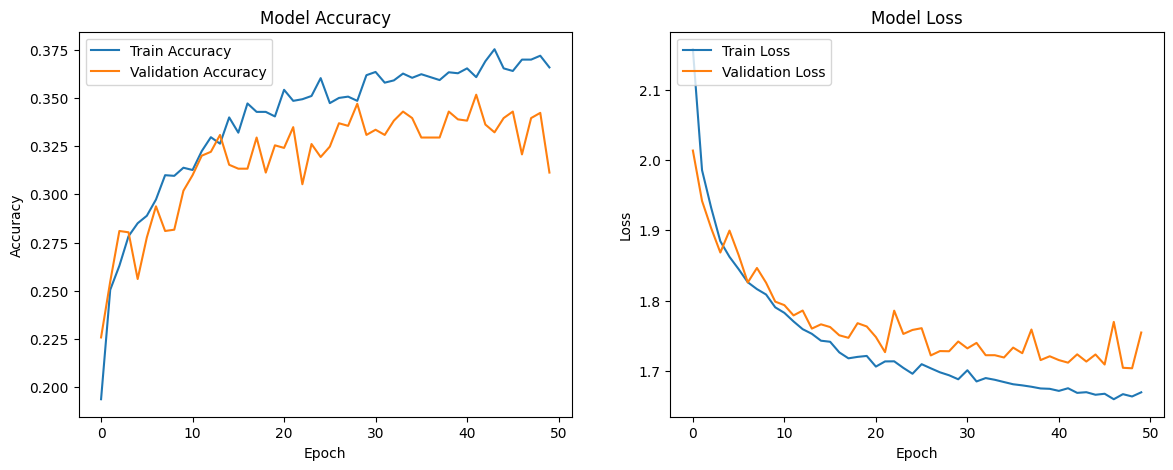

In [ ]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [ ]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.3132075369358063


## Random Forest

In [ ]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.5245283018867924
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.83      0.68       237
           1       0.52      0.60      0.56       222
           2       0.48      0.46      0.47       235
           3       0.61      0.61      0.61       256
           4       0.58      0.33      0.42       243
           5       0.42      0.50      0.46       214
           6       0.41      0.33      0.37       217
           7       0.56      0.52      0.54       231

    accuracy                           0.52      1855
   macro avg       0.52      0.52      0.51      1855
weighted avg       0.52      0.52      0.52      1855



Text(0.5, 1.0, 'Training Confusion Matrix')

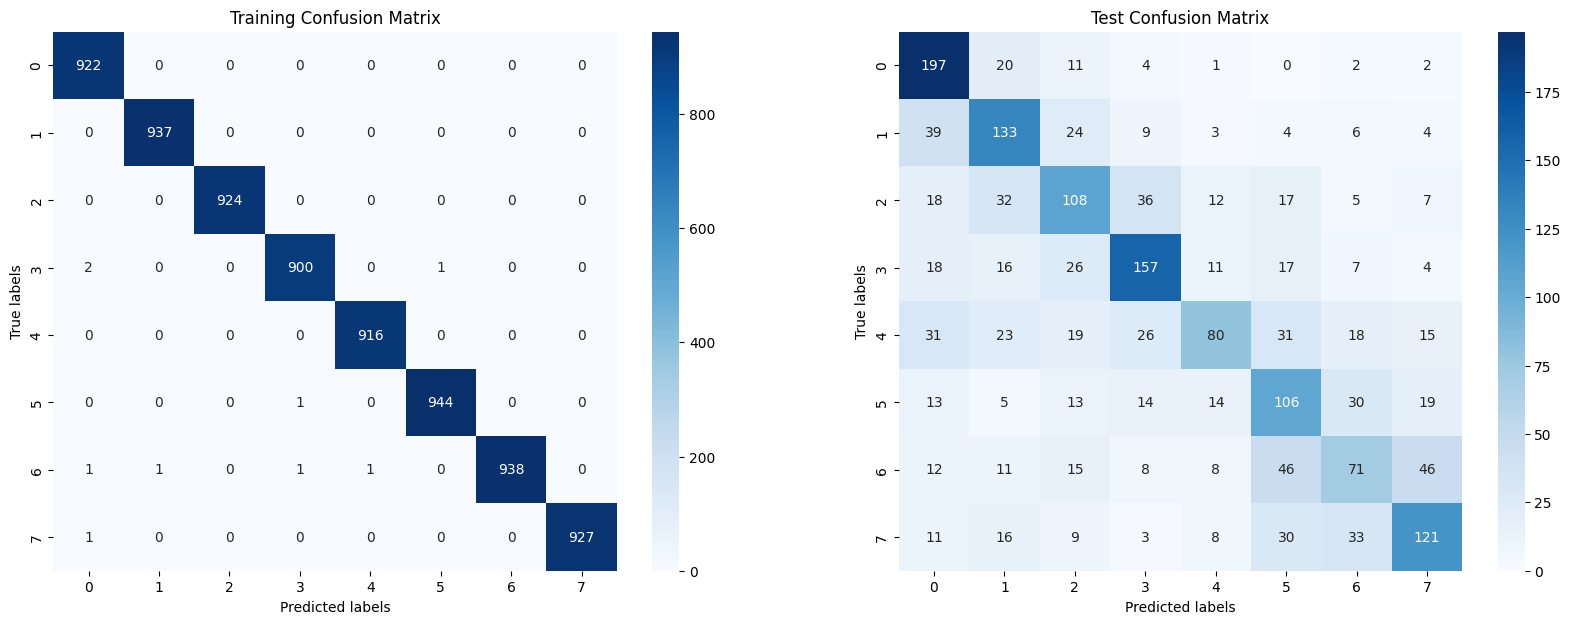

In [ ]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [ ]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [ ]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4544474393530997
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.75      0.60       237
           1       0.41      0.45      0.43       222
           2       0.37      0.37      0.37       235
           3       0.57      0.54      0.55       256
           4       0.45      0.28      0.35       243
           5       0.37      0.40      0.39       214
           6       0.36      0.30      0.33       217
           7       0.54      0.52      0.53       231

    accuracy                           0.45      1855
   macro avg       0.45      0.45      0.44      1855
weighted avg       0.45      0.45      0.45      1855



In [ ]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [ ]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.5094339622641509
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71       237
           1       0.49      0.55      0.52       222
           2       0.45      0.47      0.46       235
           3       0.62      0.57      0.60       256
           4       0.47      0.34      0.40       243
           5       0.40      0.49      0.44       214
           6       0.40      0.35      0.37       217
           7       0.56      0.49      0.53       231

    accuracy                           0.51      1855
   macro avg       0.50      0.51      0.50      1855
weighted avg       0.51      0.51      0.50      1855



## Comparison of the models

- Logistic Regression
    - Test Accuracy: 0.30616779239246356
    - Time: 19m 50.5s
- SVM
    - Test Accuracy: 0.3450134770889488
    - Time: 16m 56s
- Neural Network
    - Train Accuracy: 0.361739
    - Test Accuracy: 0.3132075369358063
    - Time: 9m 53s
- Random Forest
    - Test Accuracy: 0.5245283018867924
    - Time: 17m 56s
- XGBoost
    - Test Accuracy: 0.5094339622641509
    - Time: 3m 1s